# **치매 데이터셋(걸음 걸이, 수면, 인지 기능) EDA 2**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy.stats import mode

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
import matplotlib.font_manager as fm

for font in fm.findSystemFonts():
    if "Nanum" in font or "AppleGothic" in font:
        print(font)

plt.rcParams['font.family'] = 'AppleGothic'

plt.rcParams['axes.unicode_minus'] = False

/System/Library/AssetsV2/com_apple_MobileAsset_Font7/6f4c91728bb824d6960725ec479c355eab7eeba8.asset/AssetData/NanumScript.ttc
/System/Library/Fonts/Supplemental/AppleGothic.ttf
/Users/ijonghyeon/Library/Fonts/NanumGothic.otf
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/bad9b4bf17cf1669dde54184ba4431c22dcad27b.asset/AssetData/NanumGothic.ttc
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/70816a43827731d40efe234b94feba96db91024f.asset/AssetData/NanumMyeongjo.ttc


### 1. 걸음걸이 분석

In [ ]:
walk = pd.read_csv('128.치매 고위험군 라이프로그/01.데이터/1.Training/원천데이터/1.걸음걸이/train_activity.csv')

# 비착용 비율 계산
walk['non_wear_ratio'] = (1440 - walk['activity_non_wear']) / 1440

question_columns = [col for col in walk.columns if 'activity' in col]
question_columns = [col for col in question_columns if pd.api.types.is_numeric_dtype(walk[col])]

weighted_avg_df = walk.groupby('EMAIL').apply(
    lambda x: (x[question_columns].multiply(x['non_wear_ratio'], axis=0)).mean()
).reset_index()

weighted_avg_df.head()

/var/folders/l4/509zfk3j4yxfbd67y460c46c0000gn/T/ipykernel_38448/2755021952.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_df = walk.groupby('EMAIL').apply(


EMAIL  activity_average_met  activity_cal_active  \
0  nia+003@rowan.kr              1.226416           196.719874   
1  nia+005@rowan.kr              1.326026           210.883696   
2  nia+010@rowan.kr              1.356116           252.770091   
3  nia+014@rowan.kr              1.404869           391.209191   
4  nia+015@rowan.kr              1.285957           251.353829   

   activity_cal_total  activity_daily_movement  activity_high  \
0         2145.032187              3553.482892       0.767802   
1         1716.864454              4929.567588       0.249576   
2         2306.778424              3771.851832       0.626988   
3         2438.468147              7064.535733       0.367647   
4         1958.330694              4671.052421       1.868790   

   activity_inactive  activity_inactivity_alerts  activity_low  \
0         598.537643                    0.788867    142.576113   
1         556.671970                    0.523470    272.717847   
2         617.974832                    0.356657    320.075670   
3         521.851961                    0.172641    335.572324   
4         452.051508                    0.272440    302.892401   

   activity_medium  activity_met_min_high  activity_met_min_inactive  \
0        17.726356               5.789892                   6.040322   
1        14.909040               1.729529                  11.150799   
2         8.858932               4.305987                  14.156549   
3        30.144598               3.241228                   8.596334   
4        26.023075               8.133671                   9.698929   

   activity_met_min_low  activity_met_min_medium  activity_non_wear  \
0             92.496528                57.205445          36.571164   
1            171.046755                48.992496          44.138514   
2            166.356681                26.477203          32.352275   
3            213.714267                95.691973          34.520139   
4            159.638155                57.075952          92.530377   

   activity_rest  activity_score  activity_score_meet_daily_targets  \
0     602.582826       56.980390                          18.272972   
1     504.136062       52.722523                          11.178411   
2     425.214751       64.138949                          52.681094   
3     479.425684       88.802890                          89.624203   
4     458.605278       73.020536                          67.372361   

   activity_score_move_every_hour  activity_score_recovery_time  \
0                       89.823975                     96.849427   
1                       92.418775                     93.051094   
2                       94.775527                     97.439511   
3                       96.489737                     95.659109   
4                       91.274702                     92.528452   

   activity_score_stay_active  activity_score_training_frequency  \
0                   64.241612                          21.043210   
1                   69.621626                           6.203030   
2                   63.291727                          16.626413   
3                   74.557731                          81.504320   
4                   76.569901                          39.741647   

   activity_score_training_volume  activity_steps  activity_total  
0                       51.497828     4389.336982      161.070271  
1                       45.068197     6235.611683      287.876463  
2                       40.666607     5711.089595      329.561590  
3                       90.564144     9203.772314      366.084569  
4                       57.302619     6672.644365      330.784266

In [ ]:
label_df = pd.read_csv('128.치매 고위험군 라이프로그/01.데이터/1.Training/라벨링데이터/1.걸음걸이/training_label.csv')
label_df = label_df.rename(columns={'SAMPLE_EMAIL': 'EMAIL'})

merged_df = pd.merge(weighted_avg_df, label_df, on='EMAIL', how='inner')

cn_df = merged_df[merged_df['DIAG_NM'] == 'CN'].reset_index(drop=True)
mci_df = merged_df[merged_df['DIAG_NM'] == 'MCI'].reset_index(drop=True)
dem_df = merged_df[merged_df['DIAG_NM'] == 'Dem'].reset_index(drop=True)

cn_df = cn_df.drop(columns=['DIAG_NM', 'EMAIL'])
mci_df = mci_df.drop(columns=['DIAG_NM', 'EMAIL'])
dem_df = dem_df.drop(columns=['DIAG_NM', 'EMAIL'])

In [5]:
dem_df.head(10)

activity_average_met  activity_cal_active  activity_cal_total  \
0              1.432000           537.748548         2491.201439   
1              1.260666           265.968333         2213.879472   
2              1.133780            73.774431         1994.525389   
3              1.097170           113.298921         1961.040756   
4              2.085057          1393.802241         3587.497033   
5              1.382330           415.674306         2435.634802   
6              1.276459           307.146162         2262.516188   
7              1.384547           472.311806         2421.480954   
8              1.307101           248.754589         2255.298026   

   activity_daily_movement  activity_high  activity_inactive  \
0             10301.825631       8.406490         447.928497   
1              4922.400981       0.198352         532.593685   
2              1050.060208       0.020000         608.316708   
3              2033.967070       0.368994         382.395683   
4             27613.801815      14.477289         390.111474   
5              7447.350176       3.907759         382.138234   
6              5558.797307       0.187209         491.472457   
7              8810.517418       2.251446         487.547336   
8              4138.063998       0.506441         520.972181   

   activity_inactivity_alerts  activity_low  activity_medium  \
0                    0.135417    279.533447        47.730000   
1                    0.993778    126.794556        41.372278   
2                    1.046292     79.377236         2.564083   
3                    0.114621     99.968778         7.218009   
4                    0.336316    482.400142       165.789410   
5                    0.159954    303.975942        36.285201   
6                    0.328200    159.751323        45.048883   
7                    0.124693    166.967600        79.133037   
8                    0.152328    261.161057        14.171160   

   activity_met_min_high  activity_met_min_inactive  activity_met_min_low  \
0              62.665025                   5.124533            224.262210   
1               1.543546                   6.867130             80.661231   
2               0.140000                   7.907083             44.659792   
3               2.759760                   3.972222             62.715587   
4             104.870423                   4.849590            479.061616   
5              29.860217                   5.886542            188.607990   
6               1.323977                   6.667915             94.294482   
7              17.311817                   5.525615            101.199112   
8               3.427151                  10.956972            147.717838   

   activity_met_min_medium  activity_non_wear  activity_rest  activity_score  \
0               149.575783          73.900631     498.755480       89.179886   
1               129.385389          31.713500     659.380963       72.268000   
2                 7.787569          45.622083     636.959889       46.503639   
3                23.547250          49.437228     829.097795       54.180846   
4               555.613431          16.444444     326.140878       85.673895   
5               116.891587          11.921288     684.633645       77.354326   
6               150.016761          37.311496     666.296199       70.888636   
7               263.808174          39.686418     608.368056       88.293374   
8                44.852002          24.185975     580.375735       69.870779   

   activity_score_meet_daily_targets  activity_score_move_every_hour  \
0                          91.551742                       93.316503   
1                          33.263722                       89.062741   
2                           5.309014                       86.815542   
3                           8.224155                       95.513833   
4                          98.311948                       96.272522   
5                          33.723428

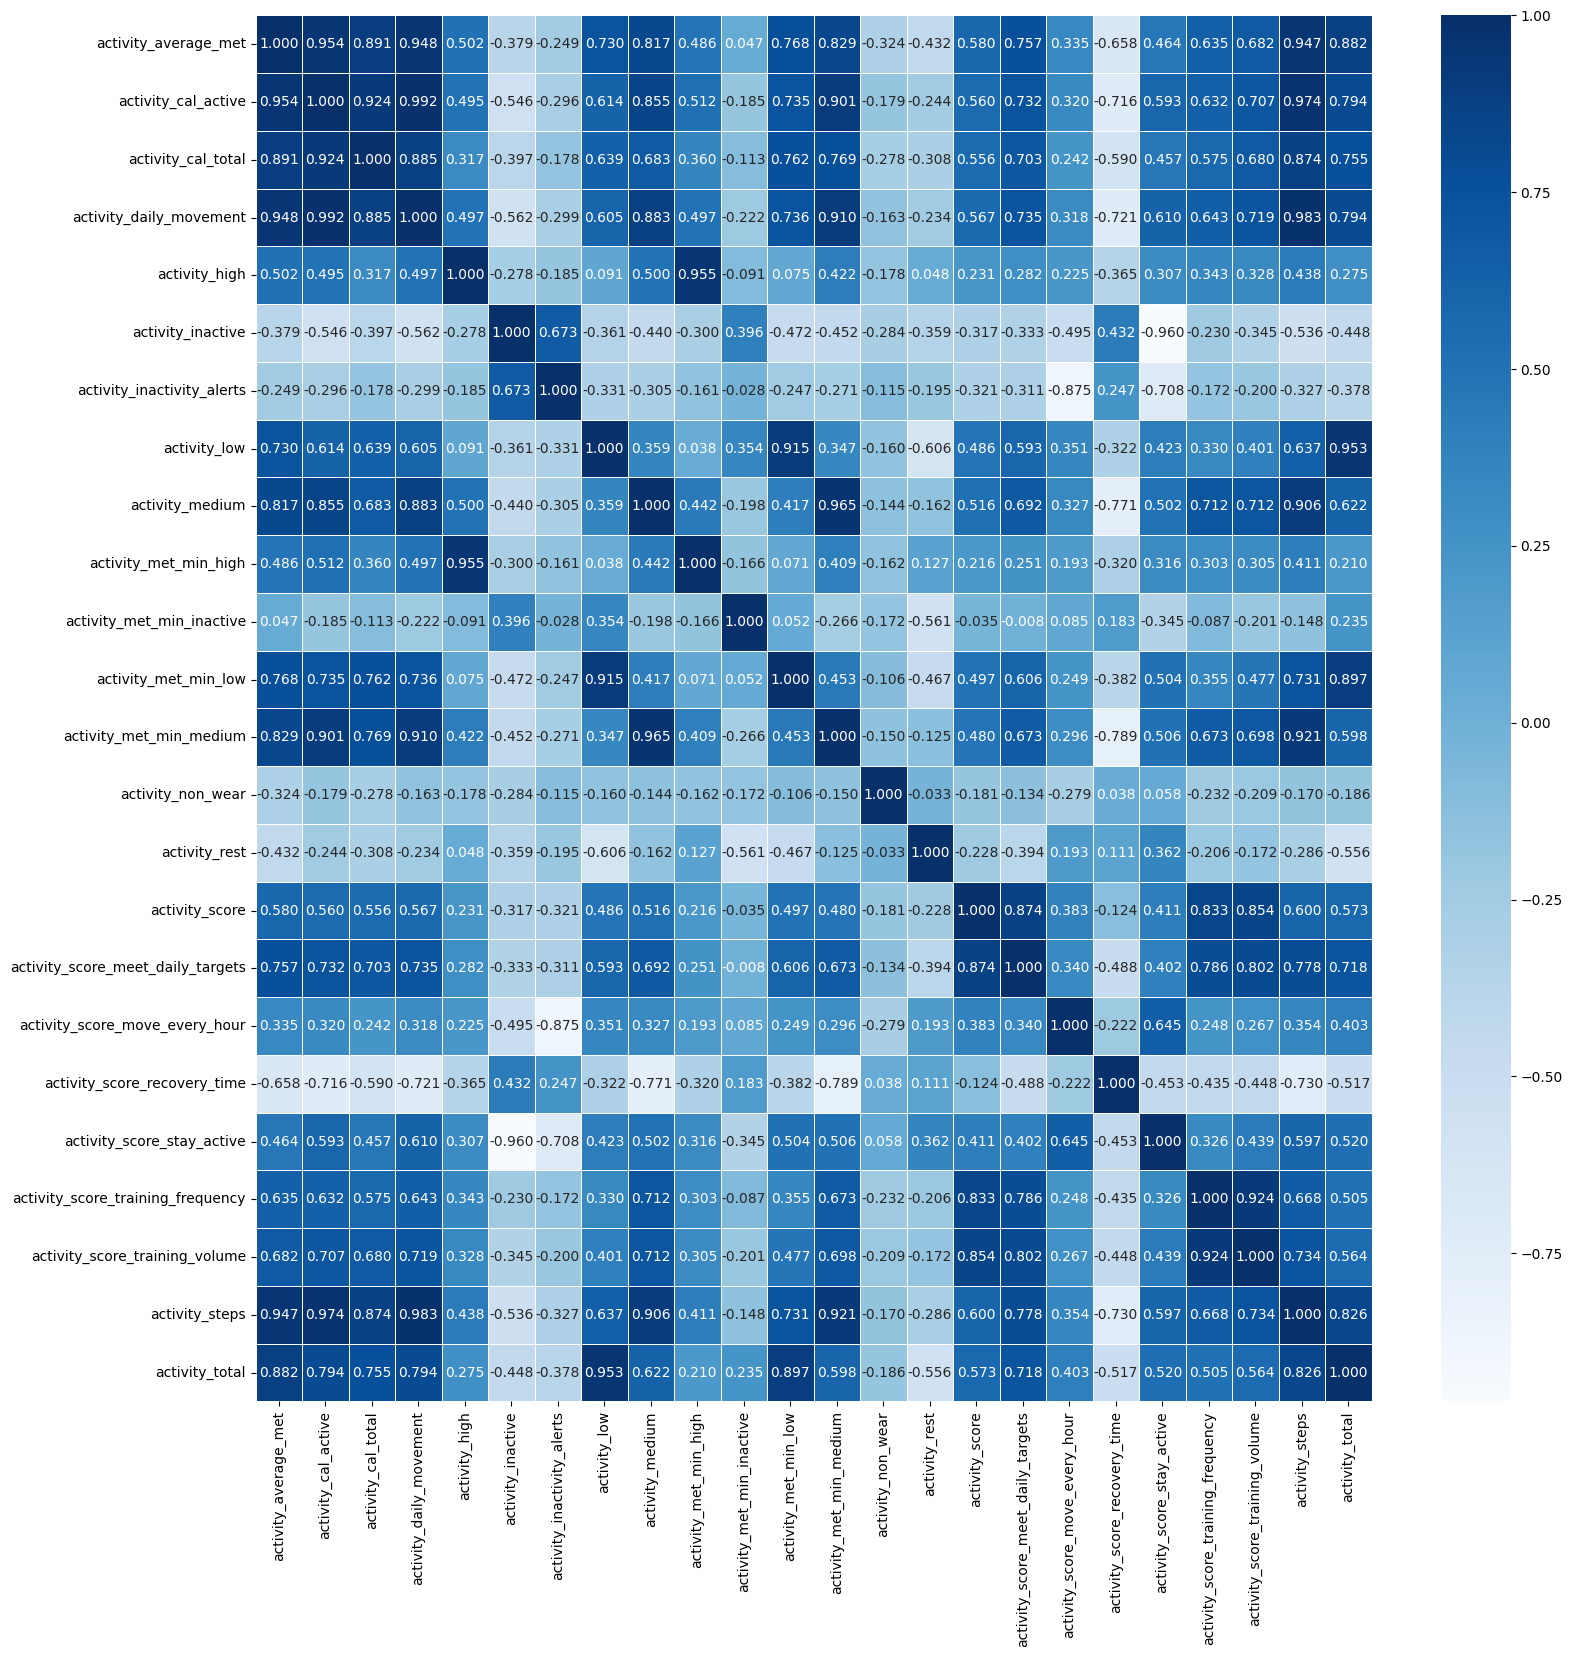

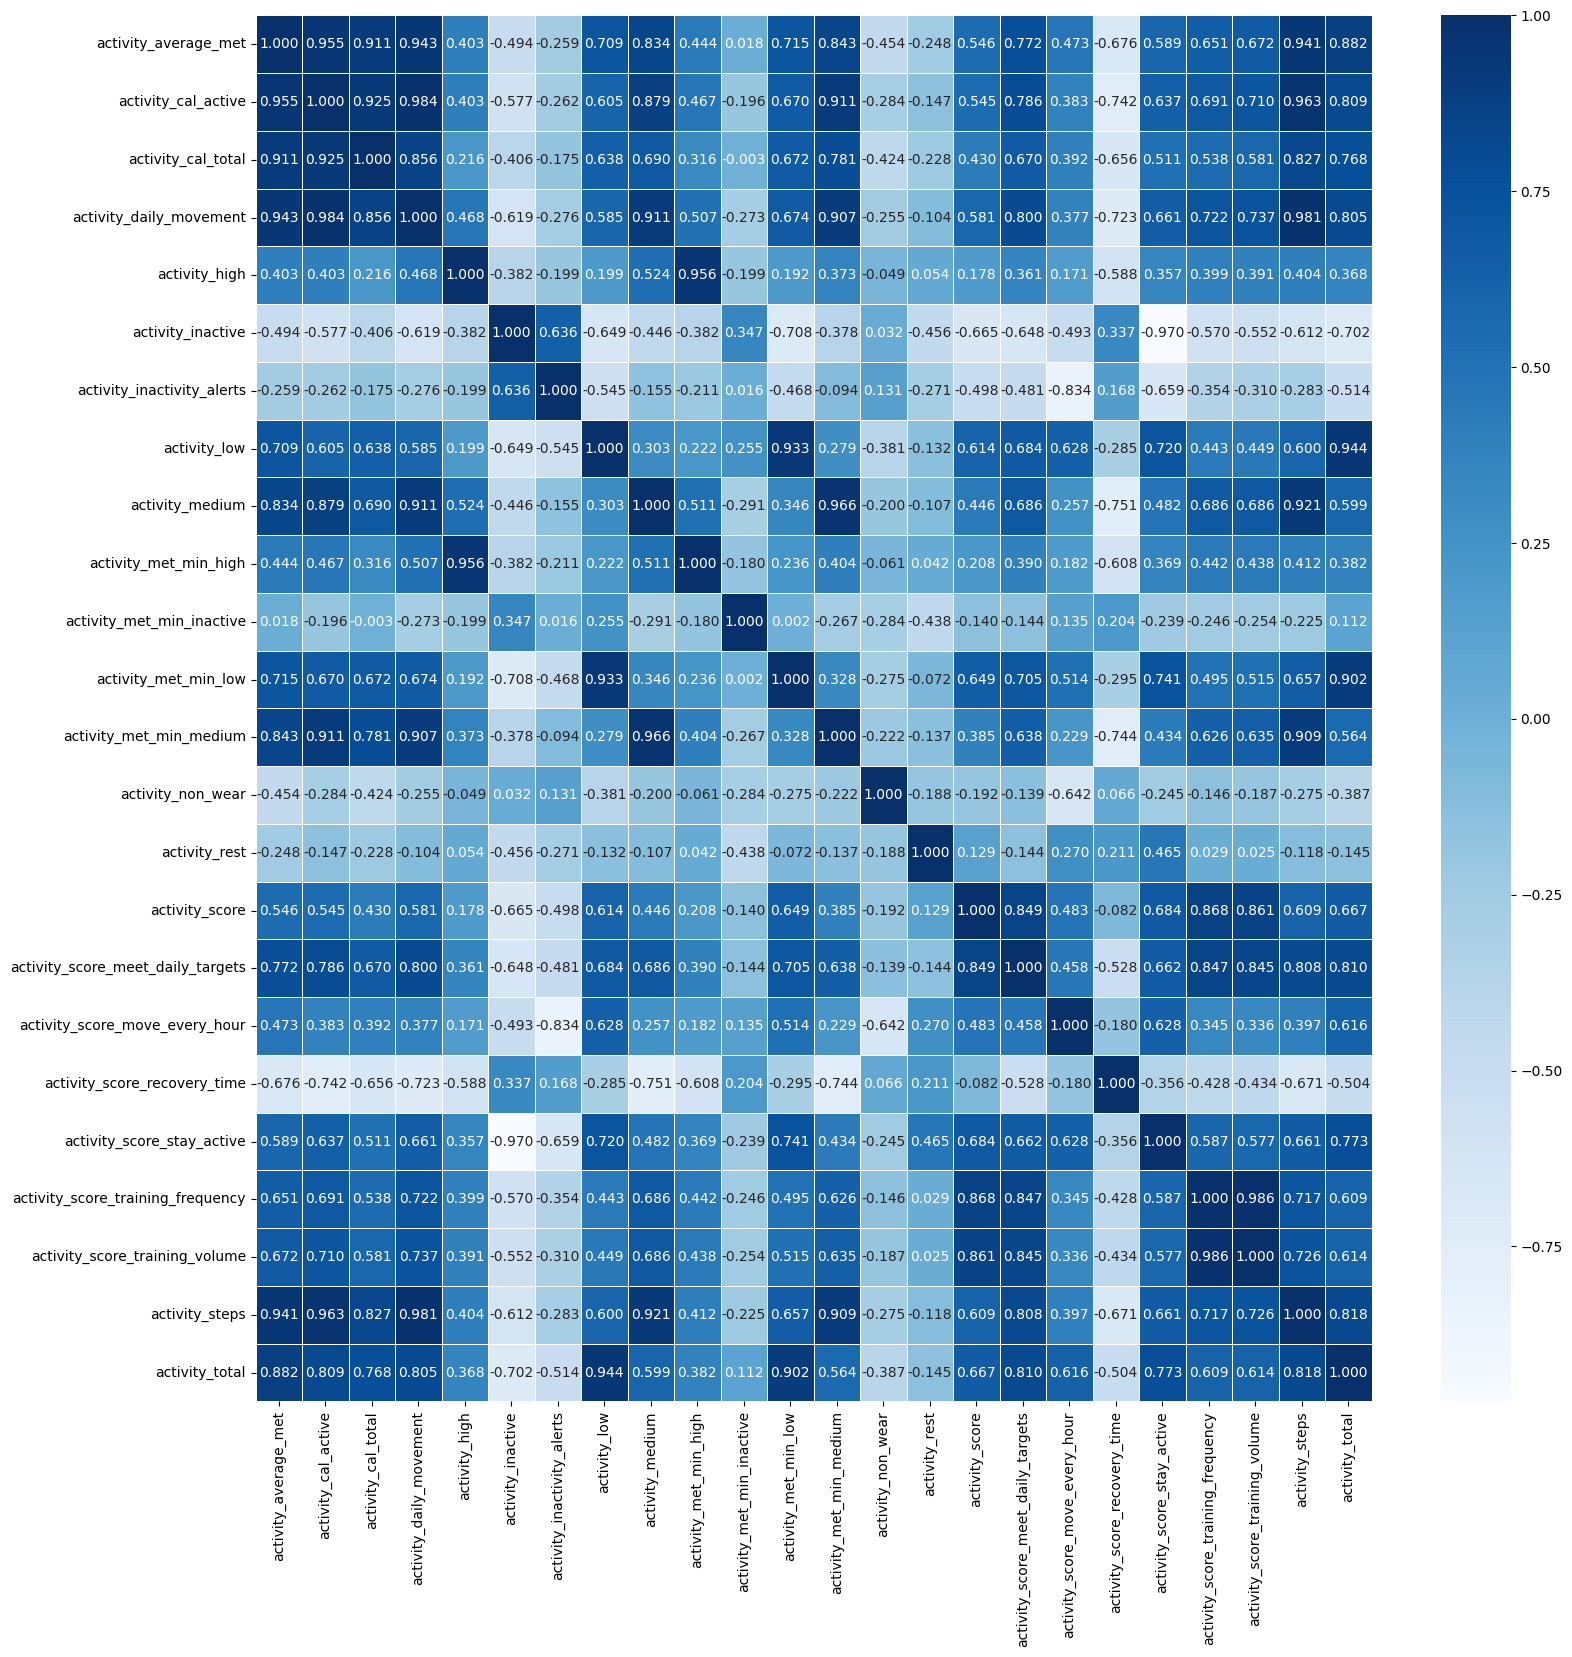

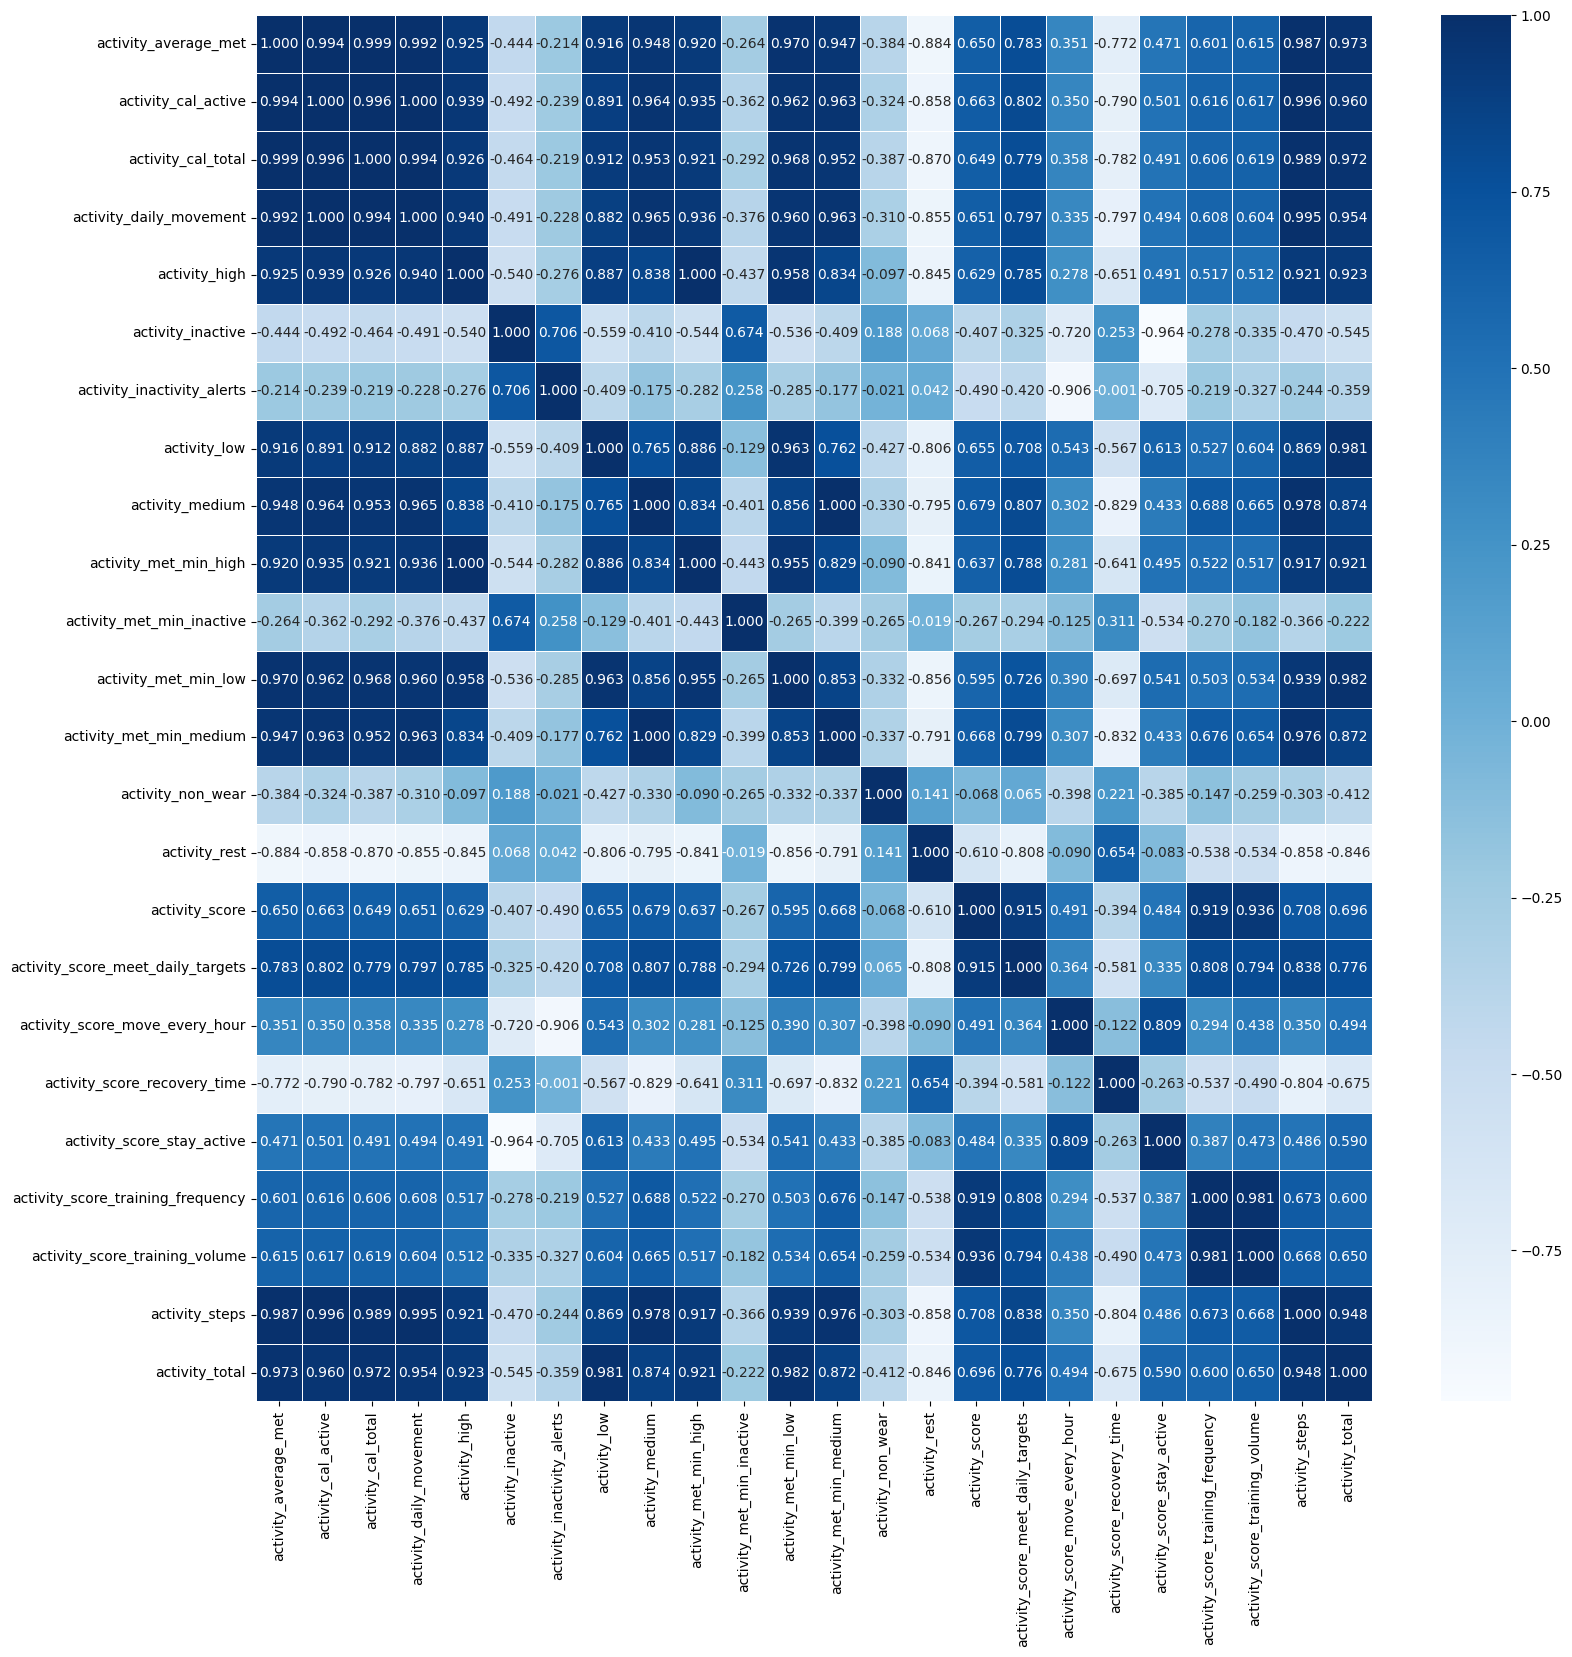

In [18]:
plt.figure(figsize=(18, 18))
sns.heatmap(data=cn_df.corr(numeric_only=True), annot=True, fmt='.3f', linewidths=0.5, cmap='Blues')
plt.show()

plt.figure(figsize=(18, 18))
sns.heatmap(data=mci_df.corr(numeric_only=True), annot=True, fmt='.3f', linewidths=0.5, cmap='Blues')
plt.show()

plt.figure(figsize=(18, 18))
sns.heatmap(data=dem_df.corr(numeric_only=True), annot=True, fmt='.3f', linewidths=0.5, cmap='Blues')
plt.show()

/opt/anaconda3/envs/for_tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/for_tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/for_tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/for_tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/for_tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE})

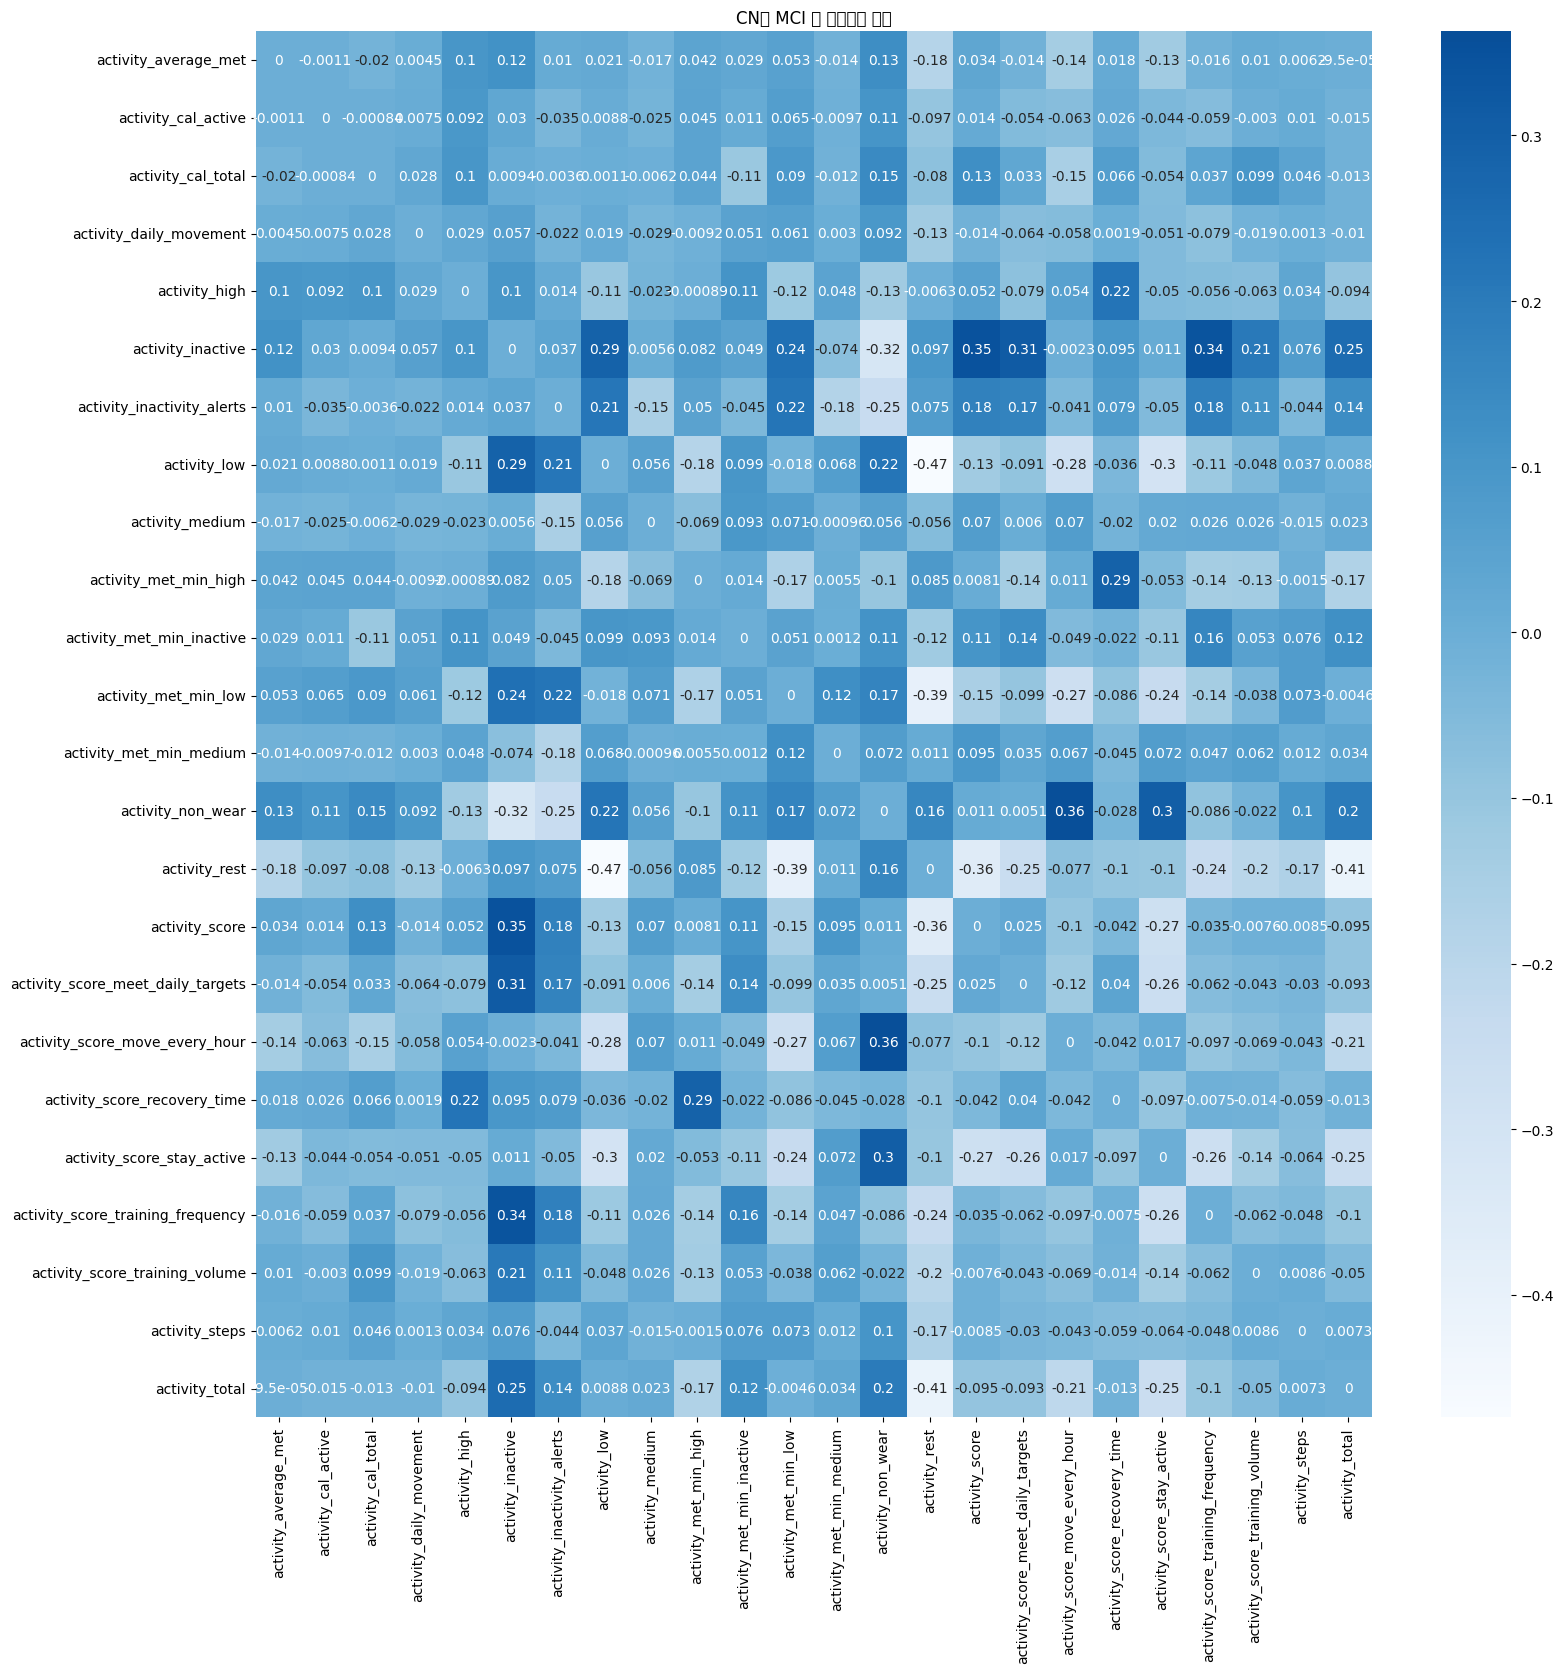

/opt/anaconda3/envs/for_tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/for_tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/for_tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/for_tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/for_tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE})

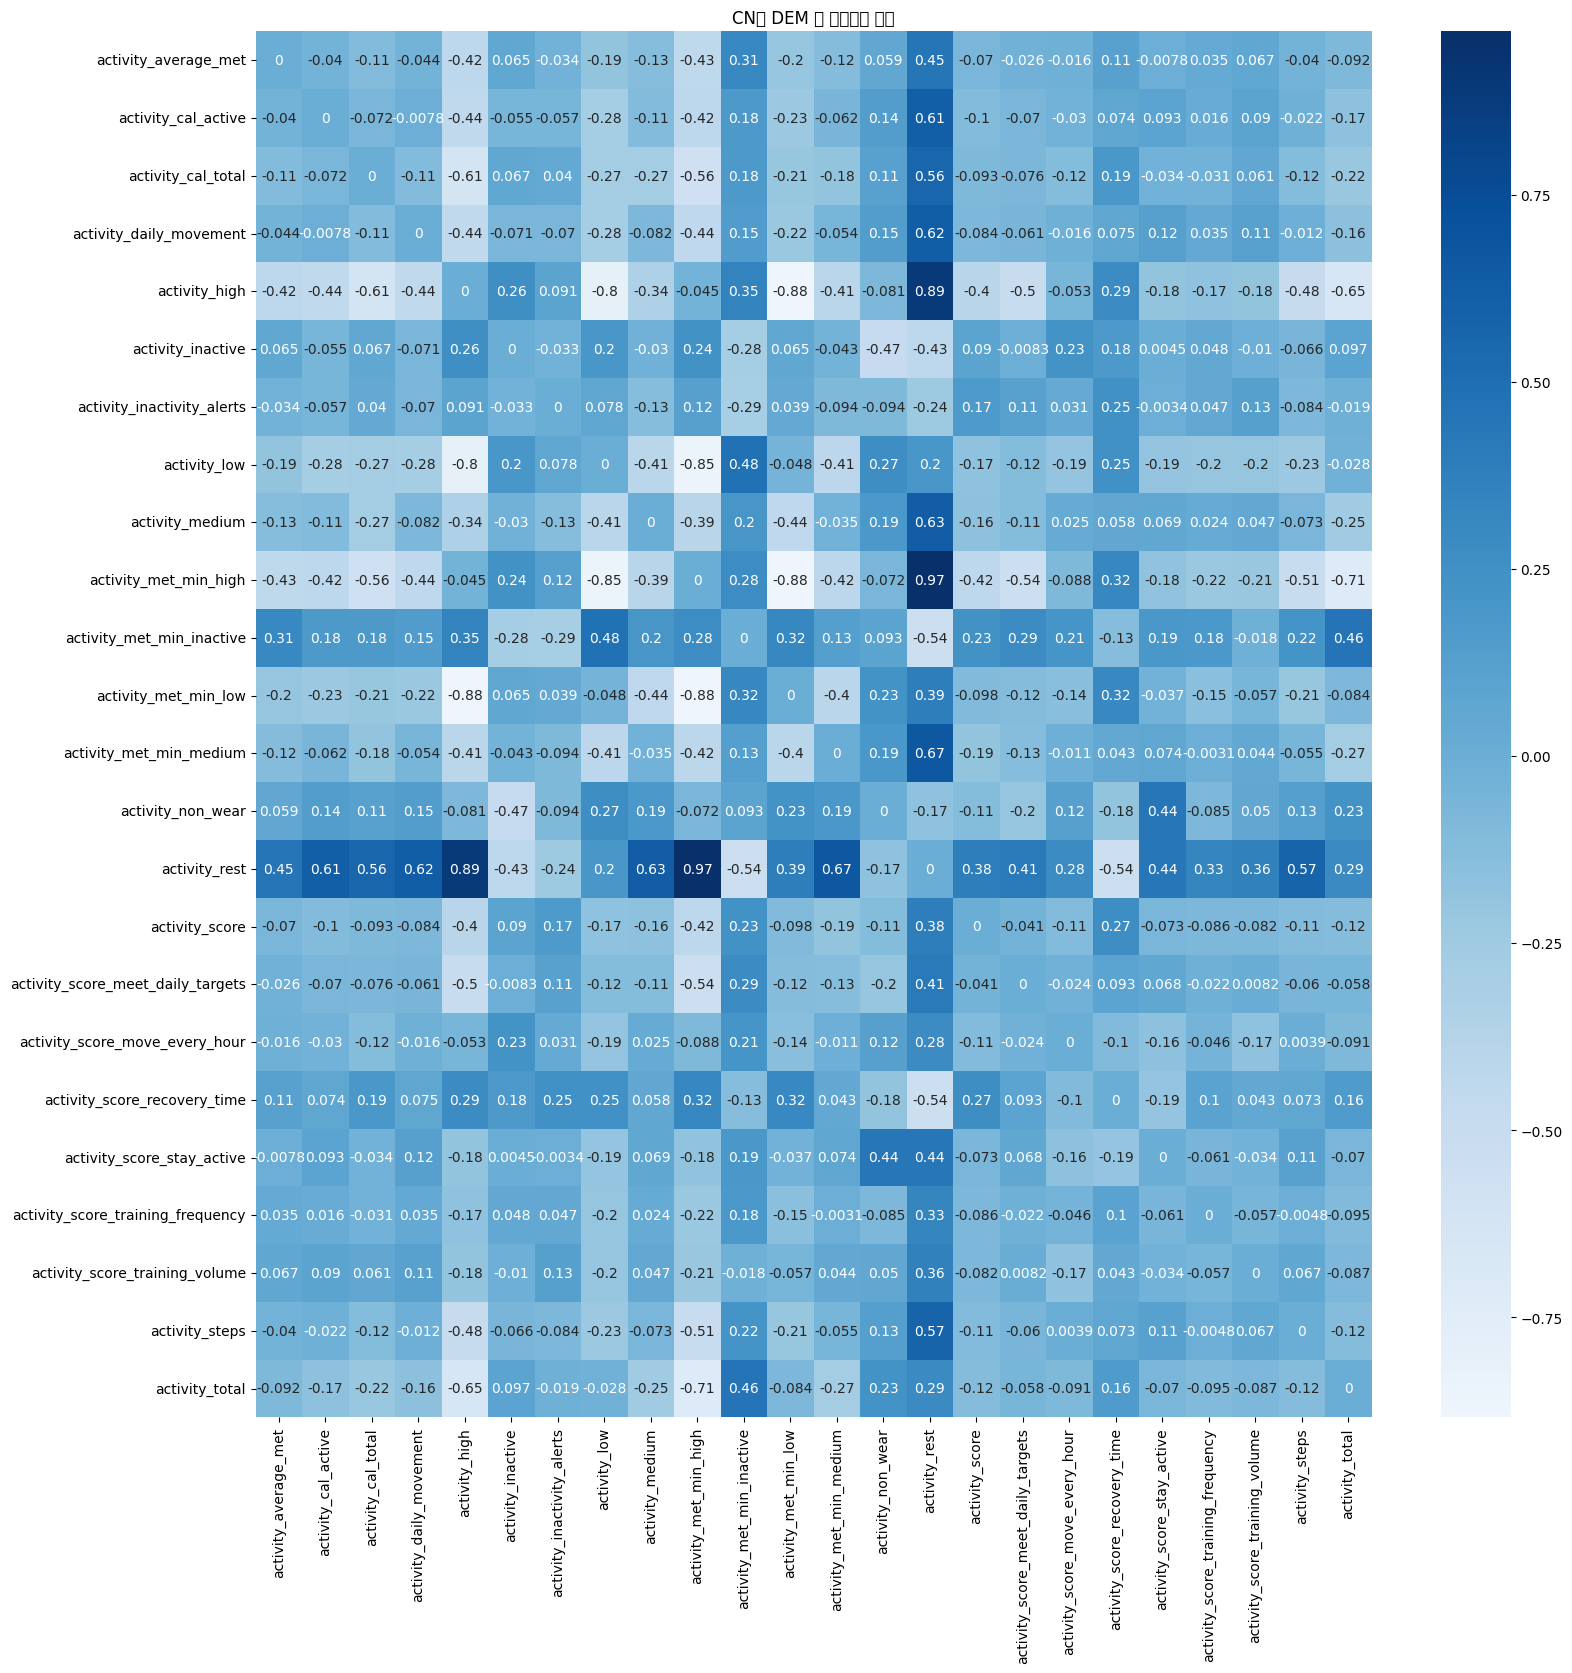

/opt/anaconda3/envs/for_tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/for_tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/for_tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/for_tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/for_tf/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) 

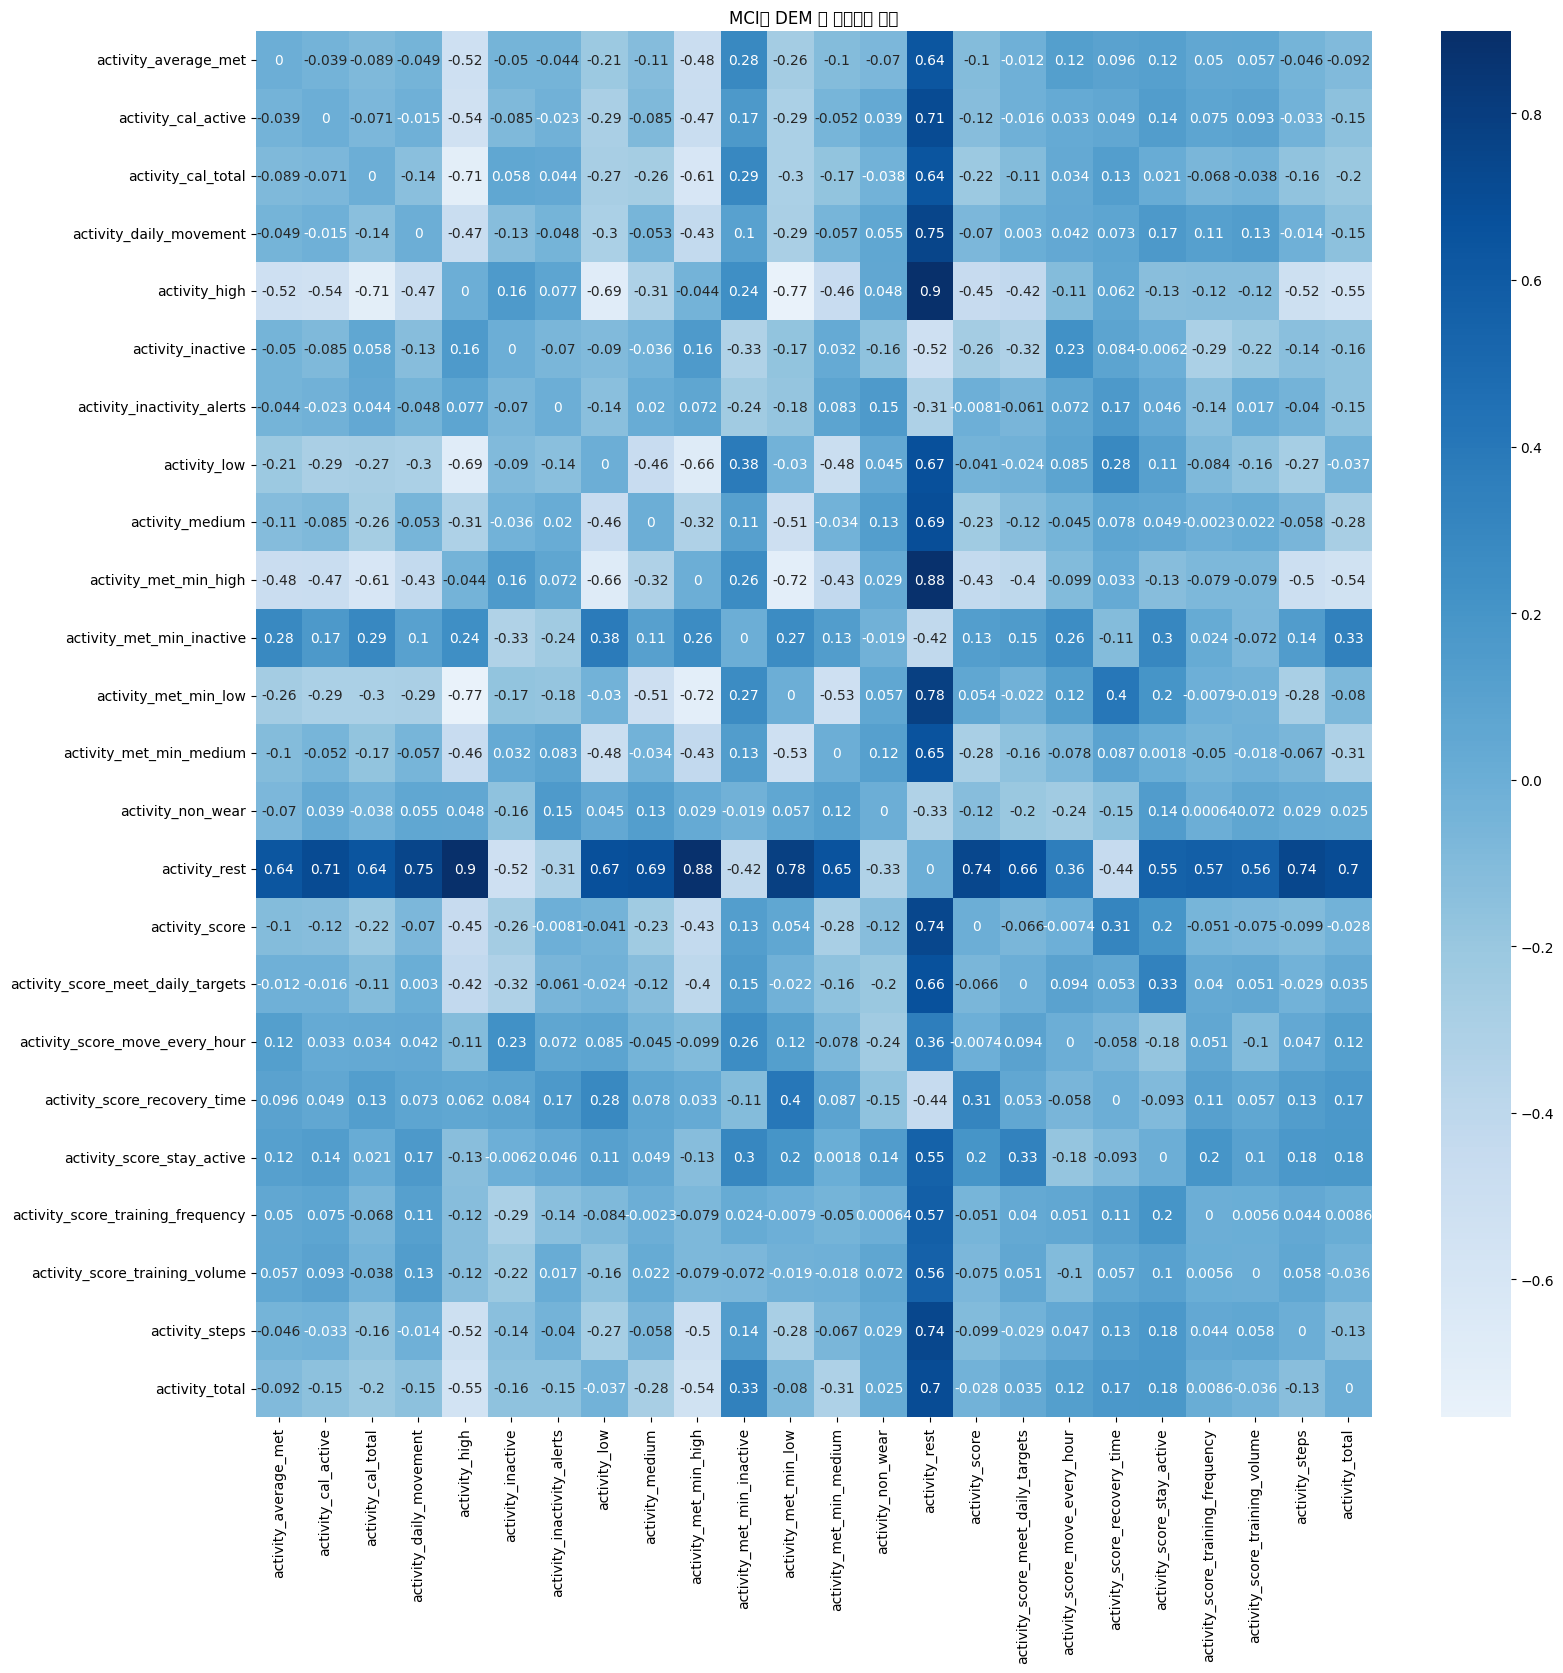

In [ ]:
cn_corr = cn_df.corr()
mci_corr = mci_df.corr()
dem_corr = dem_df.corr()

cn_mci_corr_diff = cn_corr - mci_corr
cn_dem_corr_diff = cn_corr - dem_corr
mci_dem_corr_diff = mci_corr - dem_corr

plt.figure(figsize=(18, 18))
sns.heatmap(cn_mci_corr_diff, annot=True, cmap="Blues", center=0)
plt.title("CN과 MCI 간 상관계수 차이")
plt.show()

plt.figure(figsize=(18, 18))
sns.heatmap(cn_dem_corr_diff, annot=True, cmap="Blues", center=0)
plt.title("CN과 DEM 간 상관계수 차이")
plt.show()

plt.figure(figsize=(18, 18))
sns.heatmap(mci_dem_corr_diff, annot=True, cmap="Blues", center=0)
plt.title("MCI와 DEM 간 상관계수 차이")
plt.show()

### 2. 수면 분석

In [6]:
sleep_df = pd.read_csv('128.치매 고위험군 라이프로그/01.데이터/1.Training/원천데이터/2.수면/train_sleep.csv')
label_df = pd.read_csv('128.치매 고위험군 라이프로그/01.데이터/1.Training/라벨링데이터/2.수면/training_label.csv')

label_df = label_df.rename(columns={'SAMPLE_EMAIL': 'EMAIL'})
merged_df = pd.merge(sleep_df, label_df, on='EMAIL', how='inner')

merged_df['sleep_hr_5min'] = merged_df['CONVERT(sleep_hr_5min USING utf8)'].apply(
    lambda x: [int(i) if i.isdigit() else 0 for i in x.split('/')]
)
merged_df['sleep_hypnogram_5min'] = merged_df['CONVERT(sleep_hypnogram_5min USING utf8)'].apply(
    lambda x: [int(i) if i.isdigit() else 0 for i in x.split('/')]
)
merged_df['sleep_rmssd_5min'] = merged_df['CONVERT(sleep_rmssd_5min USING utf8)'].apply(
    lambda x: [int(i) if i.isdigit() else 0 for i in x.split('/')]
)

merged_df = merged_df.drop(columns=[
    'CONVERT(sleep_hr_5min USING utf8)', 
    'CONVERT(sleep_hypnogram_5min USING utf8)', 
    'CONVERT(sleep_rmssd_5min USING utf8)'
])

In [7]:
# 선형 보간 및 최인접값으로 0 값을 처리하는 함수 정의
def interpolate_and_fill_zeros(hr_list):
    hr_array = np.array(hr_list, dtype=float)
    zero_indices = np.where(hr_array == 0)[0] 
    
    start_idx = None
    for idx in zero_indices:
        if start_idx is None:
            start_idx = idx 
        if idx + 1 not in zero_indices: 
            end_idx = idx
            
            if start_idx == 0 and end_idx < len(hr_array) - 1:
                hr_array[start_idx:end_idx + 1] = hr_array[end_idx + 1]
            
            elif end_idx == len(hr_array) - 1 and start_idx > 0:
                hr_array[start_idx:end_idx + 1] = hr_array[start_idx - 1]
            
            elif start_idx > 0 and end_idx < len(hr_array) - 1:
                if hr_array[start_idx - 1] != 0 and hr_array[end_idx + 1] != 0:
                    start_val = hr_array[start_idx - 1]
                    end_val = hr_array[end_idx + 1]
                    step = (end_val - start_val) / (end_idx - start_idx + 2)
                    
                    for i in range(start_idx, end_idx + 1):
                        hr_array[i] = start_val + step * (i - start_idx + 1)
            
          
            start_idx = None
    return hr_array

merged_df['sleep_hr_5min'] = merged_df['sleep_hr_5min'].apply(interpolate_and_fill_zeros)

In [8]:
merged_df['sleep_bedtime_start'] = pd.to_datetime(merged_df['sleep_bedtime_start'])
merged_df['date'] = merged_df['sleep_bedtime_start'].dt.date
merged_df = merged_df.sort_values(['EMAIL', 'date']).reset_index(drop=True)
merged_df.set_index(['EMAIL', 'date'], inplace=True)

cn_df = merged_df[merged_df['DIAG_NM'] == 'CN'].drop(columns=['DIAG_NM'])
mci_df = merged_df[merged_df['DIAG_NM'] == 'MCI'].drop(columns=['DIAG_NM'])
dem_df = merged_df[merged_df['DIAG_NM'] == 'Dem'].drop(columns=['DIAG_NM'])


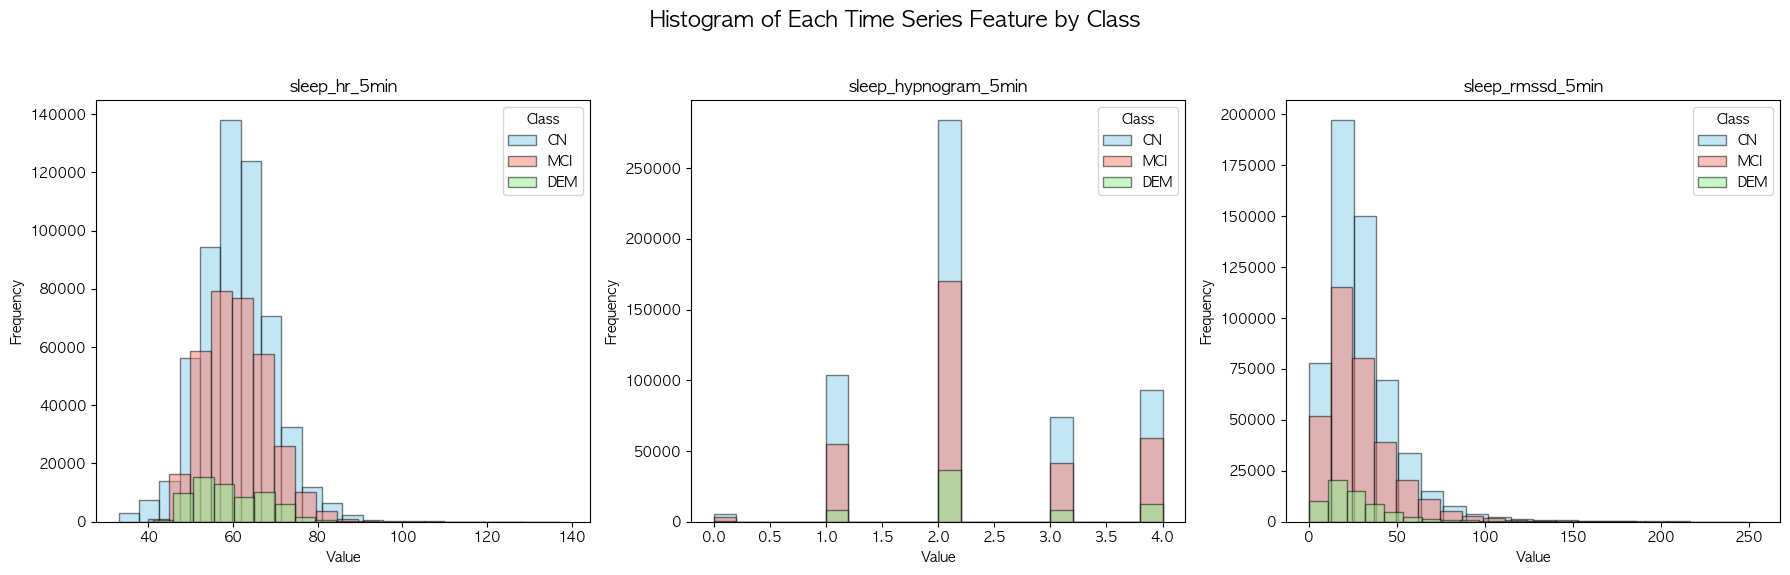

In [ ]:
features = ['sleep_hr_5min', 'sleep_hypnogram_5min', 'sleep_rmssd_5min']
class_dfs = {'CN': cn_df, 'MCI': mci_df, 'DEM': dem_df}
colors = {'CN': 'skyblue', 'MCI': 'salmon', 'DEM': 'lightgreen'}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Histogram of Each Time Series Feature by Class", fontsize=16)

for i, feature in enumerate(features):
    for class_name, df in class_dfs.items():
        data_flat = np.hstack(df[feature].values)
        axes[i].hist(data_flat, bins=20, color=colors[class_name], edgecolor='black', alpha=0.5, label=class_name)
    
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend(title="Class")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

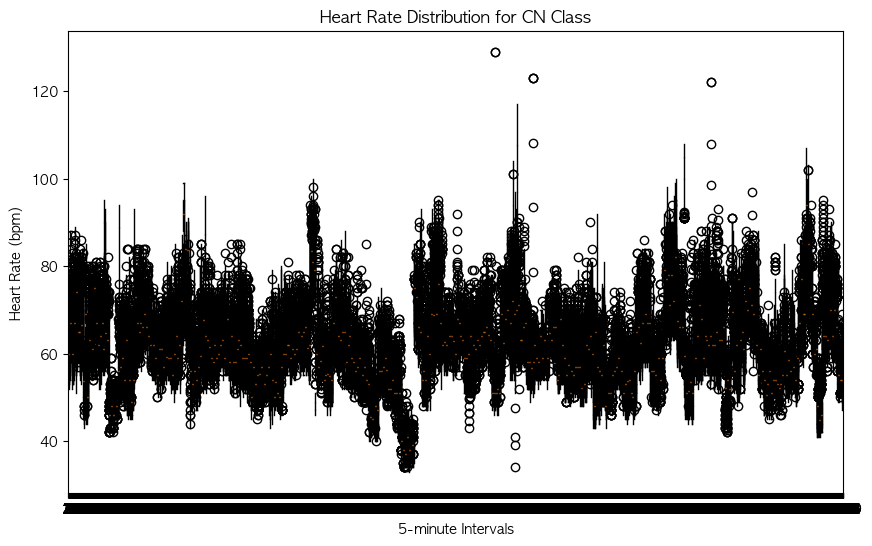

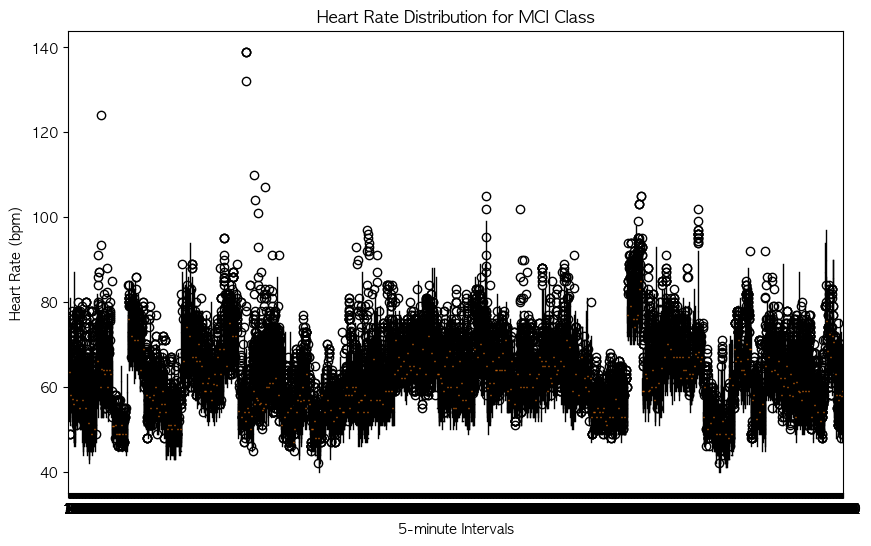

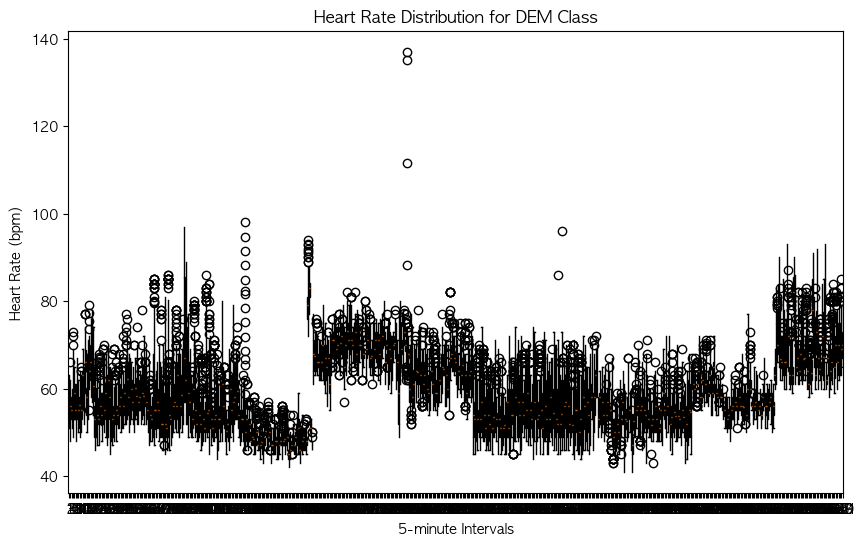

In [ ]:
def plot_boxplot(data, title):
    plt.figure(figsize=(10, 6))
    plt.boxplot(data.tolist(), vert=True, patch_artist=True)
    plt.title(title)
    plt.xlabel('5-minute Intervals')
    plt.ylabel('Heart Rate (bpm)')
    plt.show()

plot_boxplot(cn_df['sleep_hr_5min'], 'Heart Rate Distribution for CN Class')
plot_boxplot(mci_df['sleep_hr_5min'], 'Heart Rate Distribution for MCI Class')
plot_boxplot(dem_df['sleep_hr_5min'], 'Heart Rate Distribution for DEM Class')

/var/folders/l4/509zfk3j4yxfbd67y460c46c0000gn/T/ipykernel_68393/2034464107.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cn_hr_flat, mci_hr_flat, dem_hr_flat], labels=['CN', 'MCI', 'DEM'], patch_artist=True)


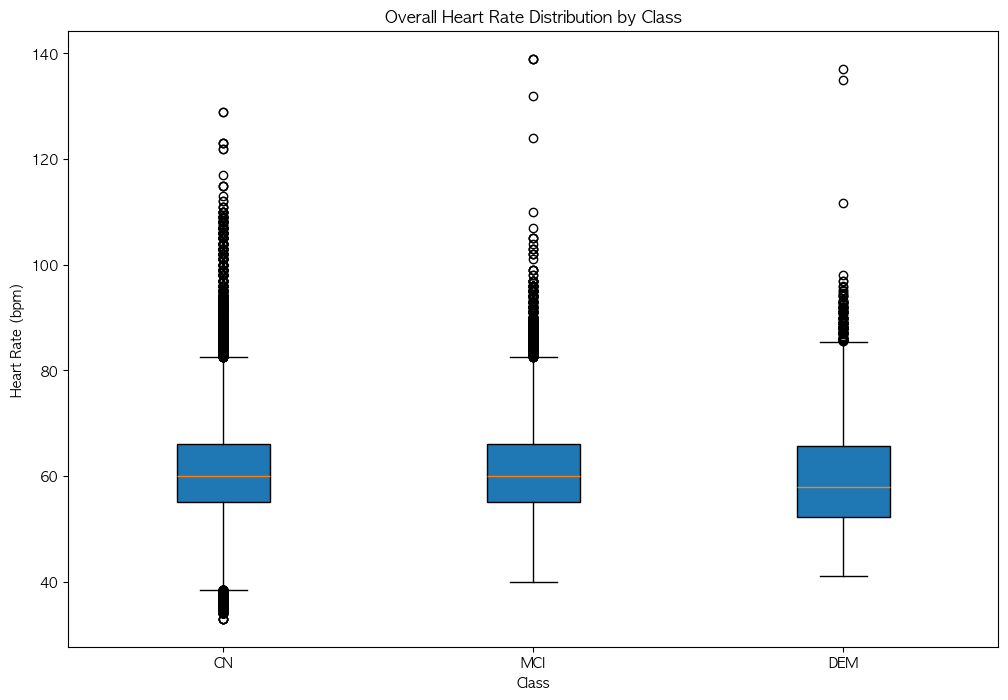

/var/folders/l4/509zfk3j4yxfbd67y460c46c0000gn/T/ipykernel_68393/2034464107.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cn_rmssd_flat, mci_rmssd_flat, dem_rmssd_flat], labels=['CN', 'MCI', 'DEM'], patch_artist=True)


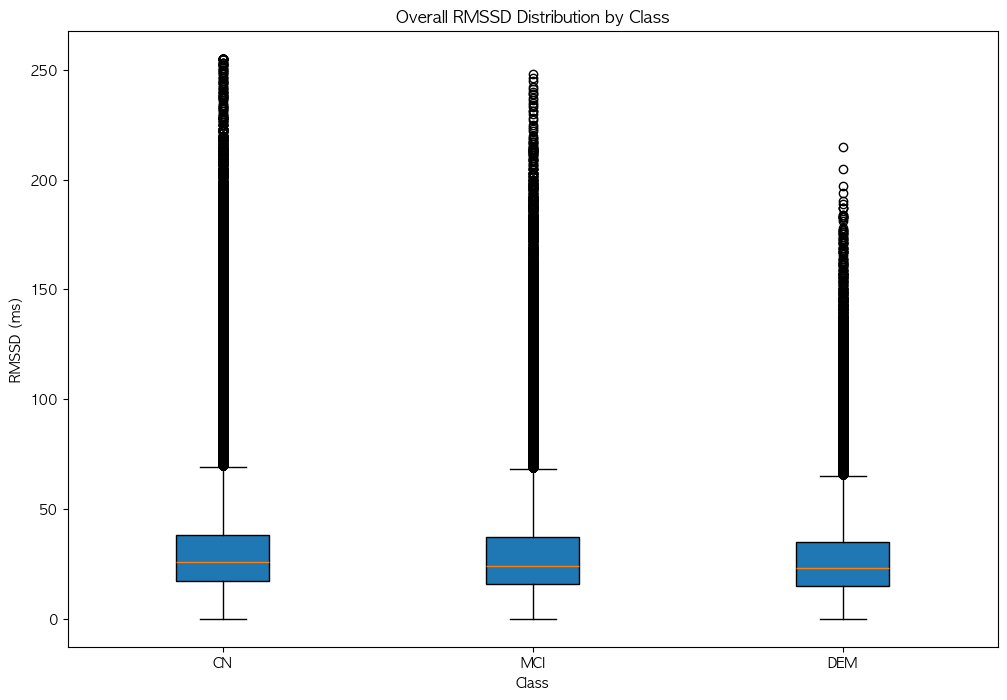

In [ ]:
cn_hr_flat = [hr for sublist in cn_df['sleep_hr_5min'] for hr in sublist]
mci_hr_flat = [hr for sublist in mci_df['sleep_hr_5min'] for hr in sublist]
dem_hr_flat = [hr for sublist in dem_df['sleep_hr_5min'] for hr in sublist]

cn_rmssd_flat = [val for sublist in cn_df['sleep_rmssd_5min'] for val in sublist]
mci_rmssd_flat = [val for sublist in mci_df['sleep_rmssd_5min'] for val in sublist]
dem_rmssd_flat = [val for sublist in dem_df['sleep_rmssd_5min'] for val in sublist]

plt.figure(figsize=(12, 8))
plt.boxplot([cn_hr_flat, mci_hr_flat, dem_hr_flat], labels=['CN', 'MCI', 'DEM'], patch_artist=True)
plt.title('Overall Heart Rate Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Heart Rate (bpm)')
plt.show()

plt.figure(figsize=(12, 8))
plt.boxplot([cn_rmssd_flat, mci_rmssd_flat, dem_rmssd_flat], labels=['CN', 'MCI', 'DEM'], patch_artist=True)
plt.title('Overall RMSSD Distribution by Class')
plt.xlabel('Class')
plt.ylabel('RMSSD (ms)')
plt.show()

/var/folders/l4/509zfk3j4yxfbd67y460c46c0000gn/T/ipykernel_68393/2471024691.py:37: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  x_ticks = pd.date_range("2022-01-01 13:00", "2022-01-02 12:59", freq="5T").tz_localize(None)


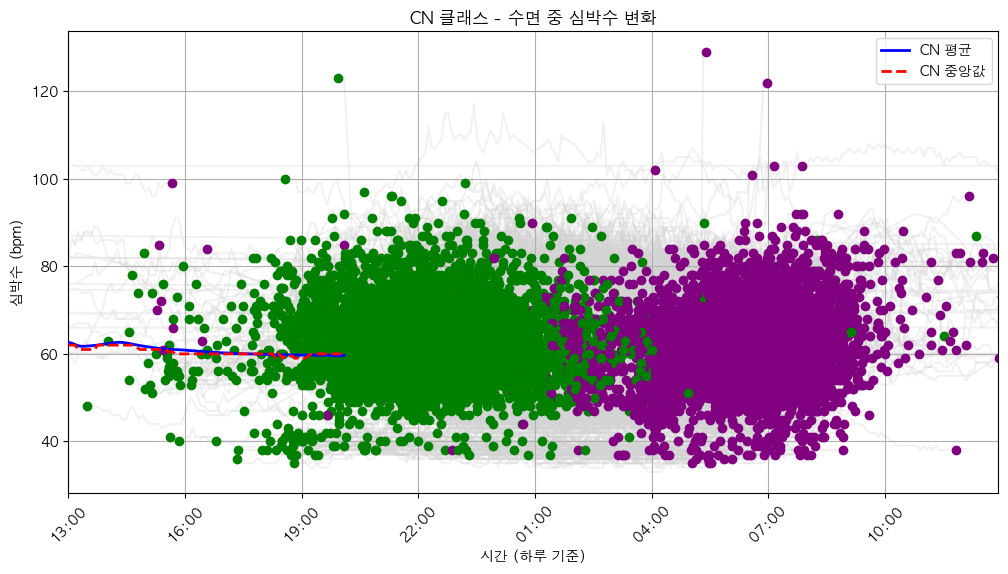

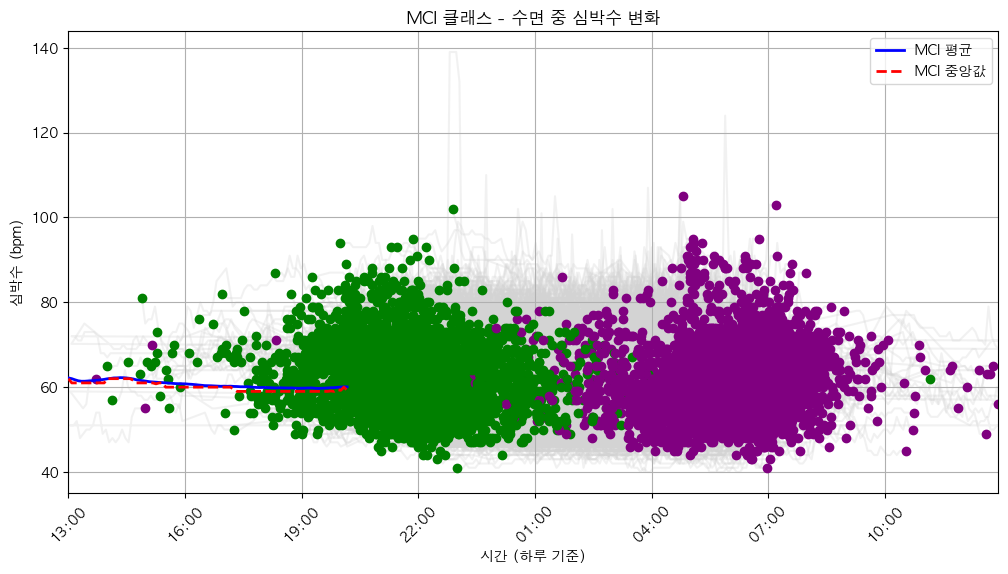

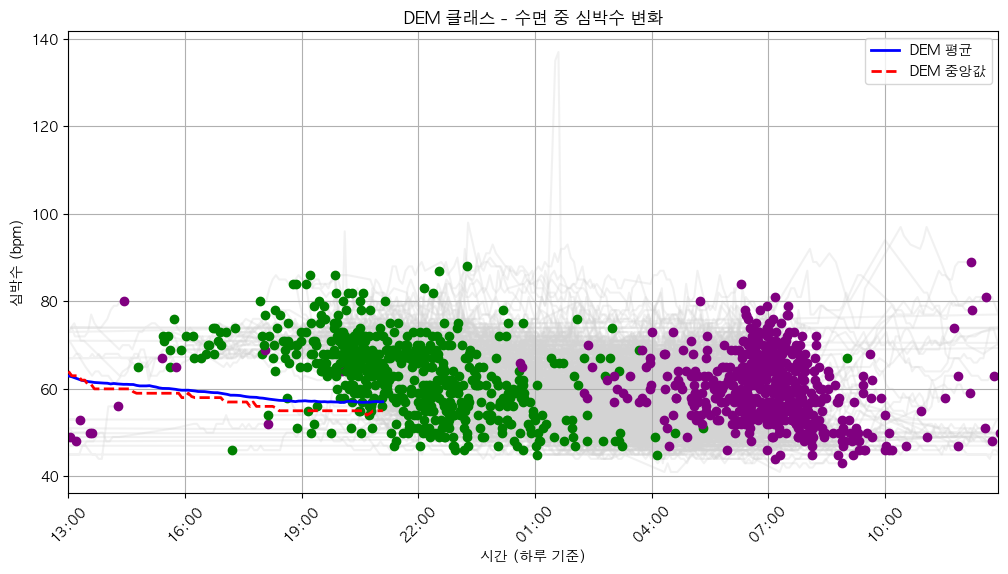

In [ ]:
x_ticks = pd.date_range("2022-01-01 13:00", "2022-01-02 12:59", freq="5T").tz_localize(None)

for class_name, df in {'CN': cn_df, 'MCI': mci_df, 'DEM': dem_df}.items():
    plt.figure(figsize=(12, 6))
    
    for _, row in df.iterrows():
        heart_rates = interpolate_and_fill_zeros(row['sleep_hr_5min'])
        start_time = pd.to_datetime(row['sleep_bedtime_start']).replace(year=2022, month=1, day=1).tz_localize(None)  
        time_range = [start_time + pd.Timedelta(minutes=5 * i) for i in range(len(heart_rates))]
        
        time_range = [(t if t >= x_ticks[0] else t + pd.Timedelta(days=1)) for t in time_range]

        plt.plot(time_range, heart_rates, color='lightgrey', alpha=0.3, zorder=1)  
        
        plt.scatter(time_range[0], heart_rates[0], color='green', marker='o', zorder=2, label='수면 시작' if _ == 0 else "")
        plt.scatter(time_range[-1], heart_rates[-1], color='purple', marker='o', zorder=2, label='수면 끝' if _ == 0 else "")

    max_length = max(df['sleep_hr_5min'].apply(len))
    expanded_df = pd.DataFrame([np.pad(interpolate_and_fill_zeros(row['sleep_hr_5min']),
                                       (0, max_length - len(row['sleep_hr_5min'])),
                                       constant_values=np.nan)
                                for _, row in df.iterrows()])

    valid_counts = expanded_df.notna().sum()
    mean_hr = expanded_df.mean()
    median_hr = expanded_df.median()
    
    full_time_range = [x_ticks[i % len(x_ticks)] for i in range(max_length)]
    
    mean_hr[valid_counts < len(df) * 0.7] = np.nan
    median_hr[valid_counts < len(df) * 0.7] = np.nan

    plt.plot(full_time_range, mean_hr, label=f'{class_name} 평균', color='blue', linewidth=2, zorder=3)
    plt.plot(full_time_range, median_hr, label=f'{class_name} 중앙값', color='red', linestyle='--', linewidth=2, zorder=3)

    plt.title(f'{class_name} 클래스 - 수면 중 심박수 변화')
    plt.xlabel('시간 (하루 기준)')
    plt.ylabel('심박수 (bpm)')
    plt.xticks(x_ticks[::36], [t.strftime("%H:%M") for t in x_ticks[::36]], rotation=45)  
    plt.xlim(x_ticks[0], x_ticks[-1]) 
    plt.legend()
    plt.grid(True)
    plt.show()

/var/folders/l4/509zfk3j4yxfbd67y460c46c0000gn/T/ipykernel_68393/611671422.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  x_ticks = pd.date_range("2022-01-01 13:00", "2022-01-02 12:59", freq="5T").tz_localize(None)


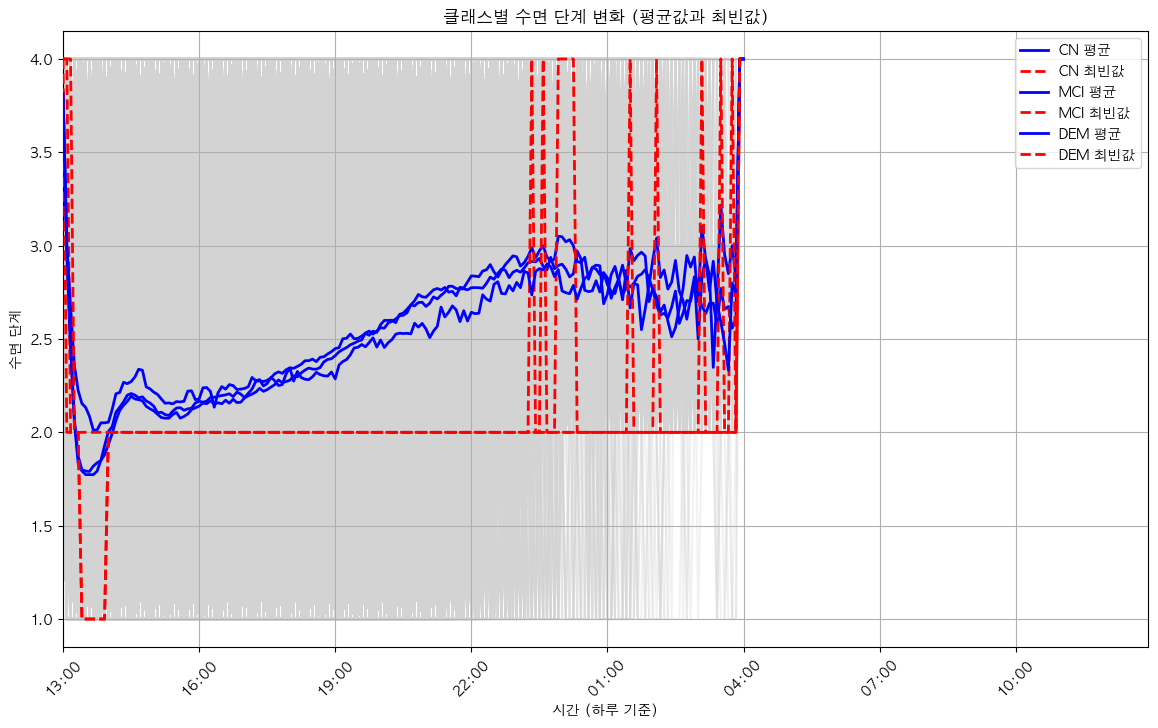

In [ ]:
x_ticks = pd.date_range("2022-01-01 13:00", "2022-01-02 12:59", freq="5T").tz_localize(None)

def preprocess_hypnogram_data(hypnogram_data):
    processed_data = []
    for row in hypnogram_data:
        hr_array = np.array(row, dtype=float)
        zero_indices = np.where(hr_array == 0)[0]
        
        if len(zero_indices) > 0:
            for idx in zero_indices:
                if idx > 0: 
                    hr_array[idx] = hr_array[idx - 1]
                elif idx == 0 and idx < len(hr_array) - 1:
                    hr_array[idx] = hr_array[idx + 1]
        processed_data.append(hr_array)
    
    return processed_data

def calculate_avg_mode(hypnogram_data):
    processed_data = preprocess_hypnogram_data(hypnogram_data)
    expanded_df = pd.DataFrame(processed_data)

    mean_vals = expanded_df.mean()
    mode_vals = expanded_df.mode().iloc[0] 

    return mean_vals, mode_vals

plt.figure(figsize=(14, 8))

for class_name, df in {'CN': cn_df, 'MCI': mci_df, 'DEM': dem_df}.items():
    mean_hypnogram, mode_hypnogram = calculate_avg_mode(df['sleep_hypnogram_5min'])

    full_time_range = [x_ticks[i % len(x_ticks)] for i in range(len(mean_hypnogram))]

    plt.plot(full_time_range, mean_hypnogram, label=f'{class_name} 평균', color='blue', linewidth=2, zorder=3)
    plt.plot(full_time_range, mode_hypnogram, label=f'{class_name} 최빈값', color='red', linestyle='--', linewidth=2, zorder=3)

    for _, row in df.iterrows():
        hypnogram = preprocess_hypnogram_data([row['sleep_hypnogram_5min']])[0] 
        time_range = [x_ticks[i % len(x_ticks)] for i in range(len(hypnogram))]
        plt.plot(time_range, hypnogram, color='lightgrey', alpha=0.3, zorder=1)

plt.title('클래스별 수면 단계 변화 (평균값과 최빈값)')
plt.xlabel('시간 (하루 기준)')
plt.ylabel('수면 단계')
plt.xticks(x_ticks[::36], [t.strftime("%H:%M") for t in x_ticks[::36]], rotation=45)  
plt.xlim(x_ticks[0], x_ticks[-1]) 
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def slice_and_filter_sleep_data(df, time_limit=300):
    filtered_df = df[df['sleep_hr_5min'].apply(lambda x: len(x) * 5 >= time_limit)]
    
    filtered_df['sleep_hr_5min'] = filtered_df['sleep_hr_5min'].apply(lambda x: x[:time_limit // 5])
    filtered_df['sleep_hypnogram_5min'] = filtered_df['sleep_hypnogram_5min'].apply(lambda x: x[:time_limit // 5])
    filtered_df['sleep_rmssd_5min'] = filtered_df['sleep_rmssd_5min'].apply(lambda x: x[:time_limit // 5])
    
    return filtered_df

processed_df = slice_and_filter_sleep_data(merged_df)

슬라이싱 후 데이터 개수: 9305
슬라이싱 후 데이터 예시:
                                                                 sleep_hr_5min  \
EMAIL            date                                                            
nia+003@rowan.kr 2020-10-18  [58.0, 58.0, 59.0, 58.0, 58.0, 60.0, 59.0, 58....   
                 2020-10-18  [56.0, 56.0, 56.0, 56.0, 55.0, 55.0, 54.0, 54....   
                 2020-10-23  [63.0, 63.0, 61.0, 61.0, 60.0, 59.0, 59.0, 58....   
                 2020-10-24  [65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65....   
                 2020-10-28  [61.0, 61.0, 60.0, 61.0, 61.0, 60.0, 60.0, 59....   

                                                          sleep_hypnogram_5min  \
EMAIL            date                                                            
nia+003@rowan.kr 2020-10-18  [4, 4, 2, 2, 2, 2, 2, 1, 1, 1, 1, 4, 2, 2, 2, ...   
                 2020-10-18  [4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, ...   
                 2020-10-23  [4, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2,

/var/folders/l4/509zfk3j4yxfbd67y460c46c0000gn/T/ipykernel_68393/1921820277.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sleep_hr_5min'] = filtered_df['sleep_hr_5min'].apply(lambda x: x[:time_limit // 5])
/var/folders/l4/509zfk3j4yxfbd67y460c46c0000gn/T/ipykernel_68393/1921820277.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sleep_hypnogram_5min'] = filtered_df['sleep_hypnogram_5min'].apply(lambda x: x[:time_limit // 5])
/var/folders/l4/509zfk3j4yxfbd67y460c46c0000gn/T

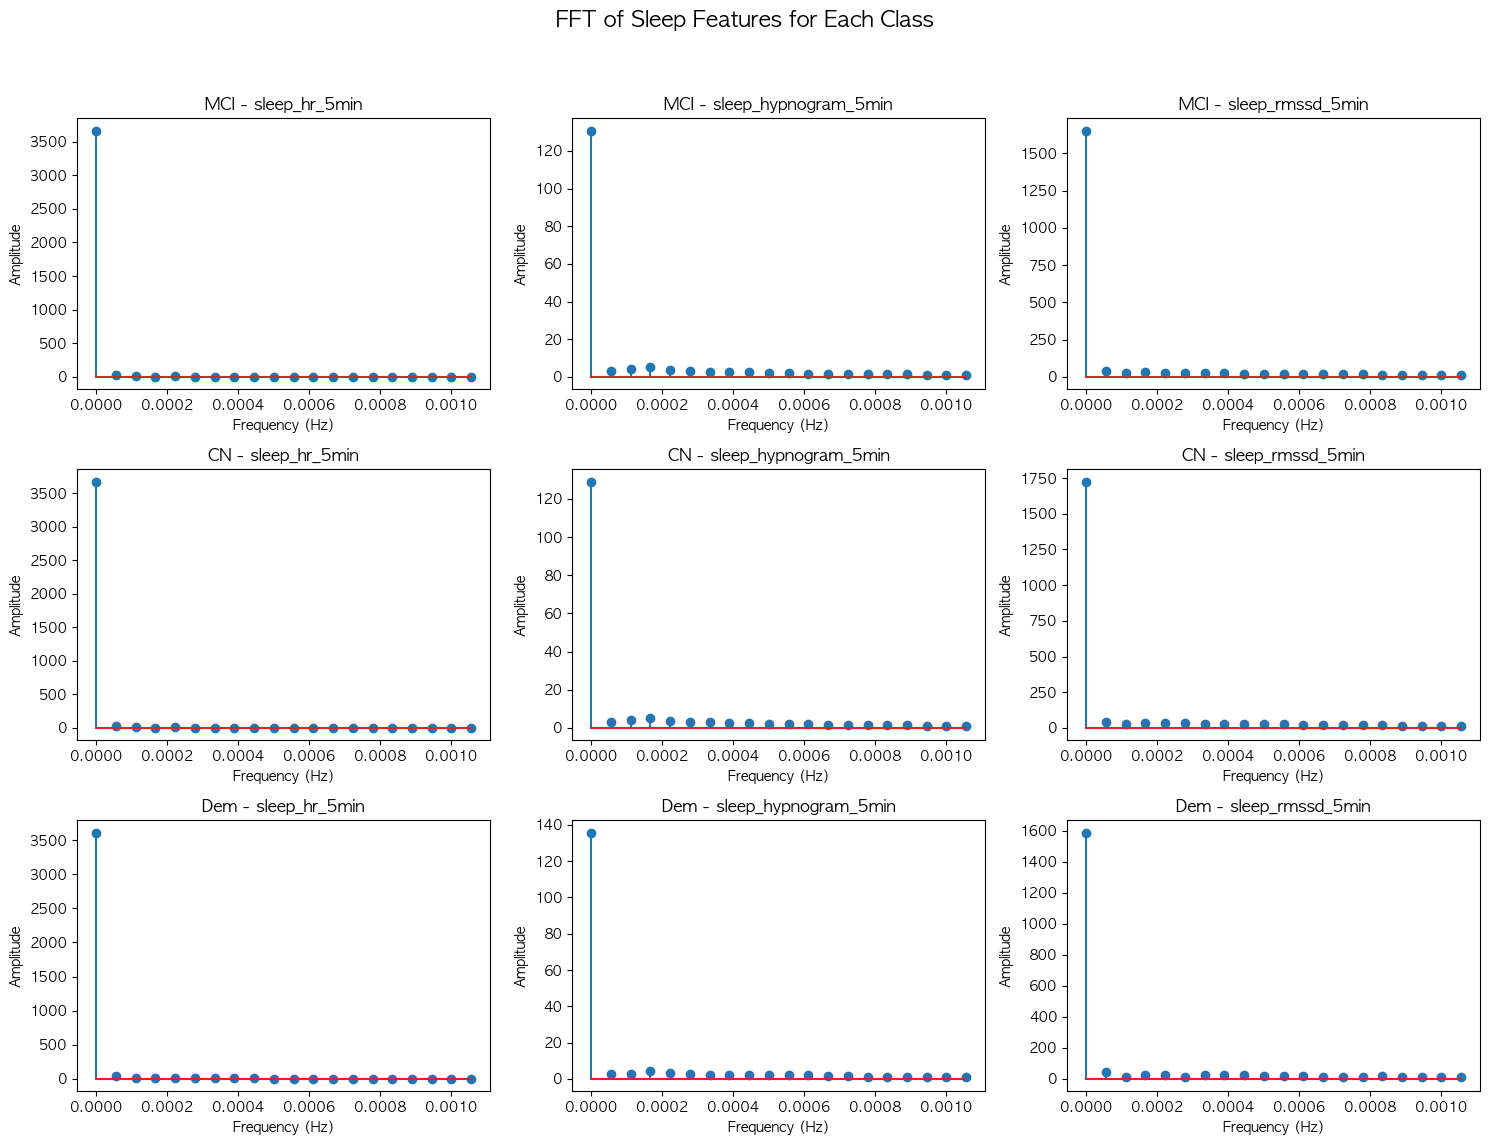

In [ ]:

def filter_and_slice(df, feature, length=60):
    return df[feature].apply(lambda x: x[:length] if len(x) >= length else None).dropna().tolist()

def plot_fft_classwise(ax, df, feature, class_label, n_freq=20):
    valid_series_list = filter_and_slice(df, feature)
    
    mean_series = np.mean(valid_series_list, axis=0)
    fft_result = np.fft.fft(mean_series)
    fft_magnitude = np.abs(fft_result)
    freqs = np.fft.fftfreq(len(fft_result), d=5*60) 
    
    ax.stem(freqs[:n_freq], fft_magnitude[:n_freq])
    ax.set_title(f'{class_label} - {feature}')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('FFT of Sleep Features for Each Class', fontsize=16)

features = ['sleep_hr_5min', 'sleep_hypnogram_5min', 'sleep_rmssd_5min']
for i, class_label in enumerate(processed_df['DIAG_NM'].unique()):
    class_df = processed_df[processed_df['DIAG_NM'] == class_label]
    for j, feature in enumerate(features):
        plot_fft_classwise(axes[i, j], class_df, feature, class_label, n_freq=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

### 3. 인지기능 분석

In [7]:
mmse = pd.read_csv('128.치매 고위험군 라이프로그/01.데이터/1.Training/원천데이터/3.인지기능/train_mmse.csv')

In [8]:
question_columns = [col for col in mmse.columns if 'Q' in col and col.startswith('Q')]

mmse_selected = mmse[question_columns + ['DIAG_NM']]

In [9]:
scaler = MinMaxScaler()
mmse_selected[question_columns] = scaler.fit_transform(mmse_selected[question_columns])

/var/folders/l4/509zfk3j4yxfbd67y460c46c0000gn/T/ipykernel_38448/651952948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmse_selected[question_columns] = scaler.fit_transform(mmse_selected[question_columns])


In [10]:
constant_columns = [col for col in question_columns if mmse[col].nunique() == 1]
print("모든 값이 동일한 열:", constant_columns)

mmse_selected[constant_columns] = 1

모든 값이 동일한 열: ['Q11_1', 'Q11_2', 'Q11_3', 'Q12_TOTAL', 'Q14_2']


/var/folders/l4/509zfk3j4yxfbd67y460c46c0000gn/T/ipykernel_38448/3213361139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmse_selected[constant_columns] = 1


In [11]:
mmse_cn = mmse_selected[mmse_selected['DIAG_NM'] == 'CN']
mmse_mci = mmse_selected[mmse_selected['DIAG_NM'] == 'MCI']
mmse_dem = mmse_selected[mmse_selected['DIAG_NM'] == 'Dem']

cn_accuracy = mmse_cn[question_columns].mean()
mci_accuracy = mmse_mci[question_columns].mean()
dem_accuracy = mmse_dem[question_columns].mean()

accuracy_df = pd.DataFrame({
    'CN': cn_accuracy,
    'MCI': mci_accuracy,
    'DEM': dem_accuracy
})

In [12]:
mmse_cn.head(10)

Q01  Q02  Q03  Q04  Q05  Q06  Q07  Q08  Q09  Q10  Q11_1  Q11_2  Q11_3  \
0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0      1      1      1   
2   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0      1      1      1   
4   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0      1      1      1   
5   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0      1      1      1   
6   1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0      1      1      1   
7   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0      1      1      1   
8   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0      1      1      1   
13  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0      1      1      1   
14  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0      1      1      1   
16  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0      1      1      1   

    Q12_1  Q12_2  Q12_3  Q12_4  Q12_5  Q12_TOTAL  Q13_1  Q13_2  Q13_3  Q14_1  \
0     1.0    1.0    1.0    1.0    1.0          1    1.0    1.0    1.0    1.0   
2     1.0    1.0    1.0    1.0    1.0          1    1.0    1.0    1.0    1.0   
4     1.0    1.0    1.0    1.0    1.0          1    1.0    1.0    1.0    1.0   
5     1.0    0.0    1.0    0.0    1.0          1    1.0    1.0    1.0    1.0   
6     1.0    1.0    1.0    1.0    1.0          1    1.0    1.0    1.0    1.0   
7     1.0    1.0    1.0    1.0    1.0          1    1.0    1.0    1.0    1.0   
8     1.0    1.0    1.0    1.0    1.0          1    1.0    1.0    1.0    1.0   
13    1.0    1.0    1.0    0.0    1.0          1    1.0    1.0    1.0    1.0   
14    1.0    1.0    1.0    1.0    1.0          1    0.0    1.0    0.0    1.0   
16    1.0    0.0    1.0    1.0    1.0          1    1.0    1.0    1.0    1.0   

    Q14_2  Q15  Q16_1  Q16_2  Q16_3  Q17  Q18  Q19 DIAG_NM  
0       1  1.0    0.0    1.0    1.0  1.0  1.0  1.0      CN  
2       1  1.0    1.0    1.0    1.0  1.0  1.0  1.0      CN  
4       1  1.0    1.0    1.0    1.0  1.0  1.0  1.0      CN  
5       1  0.0    0.0    1.0    1.0  1.0  1.0  1.0      CN  
6       1  1.0    1.0    1.0    1.0  1.0  1.0  1.0      CN  
7       1  1.0    1.0    1.0    1.0  1.0  1.0  1.0      CN  
8       1  1.0    0.0    1.0    1.0  1.0  1.0  1.0      CN  
13      1  1.0    0.0    1.0    1.0  1.0  1.0  1.0      CN  
14      1  1.0    1.0    1.0    1.0  1.0  1.0  1.0      CN  
16      1  0.0    0.0    1.0    1.0  1.0  1.0  1.0      CN

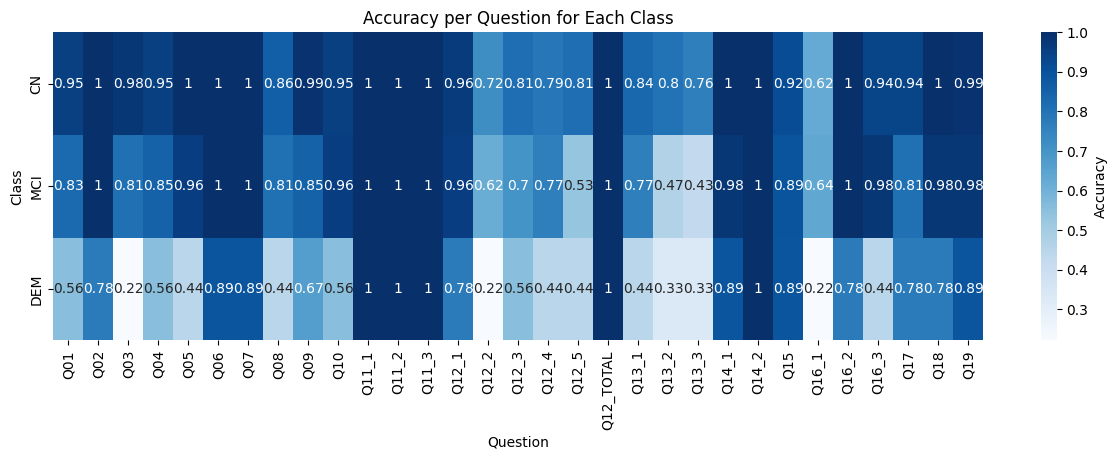

In [13]:
plt.figure(figsize=(15, 4))
sns.heatmap(accuracy_df.T, annot=True, cmap='Blues', cbar_kws={'label': 'Accuracy'})
plt.title('Accuracy per Question for Each Class')
plt.xlabel('Question')
plt.ylabel('Class')
plt.show()


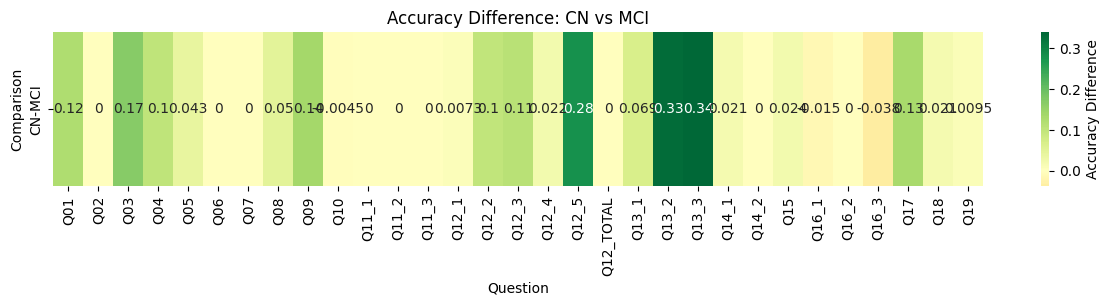

In [14]:
cn_mci_diff = pd.DataFrame({
    'CN-MCI': cn_accuracy - mci_accuracy
}).T

plt.figure(figsize=(15, 2))
sns.heatmap(cn_mci_diff, annot=True, cmap='RdYlGn', center=0, cbar_kws={'label': 'Accuracy Difference'})
plt.title('Accuracy Difference: CN vs MCI')
plt.xlabel('Question')
plt.ylabel('Comparison')
plt.show()

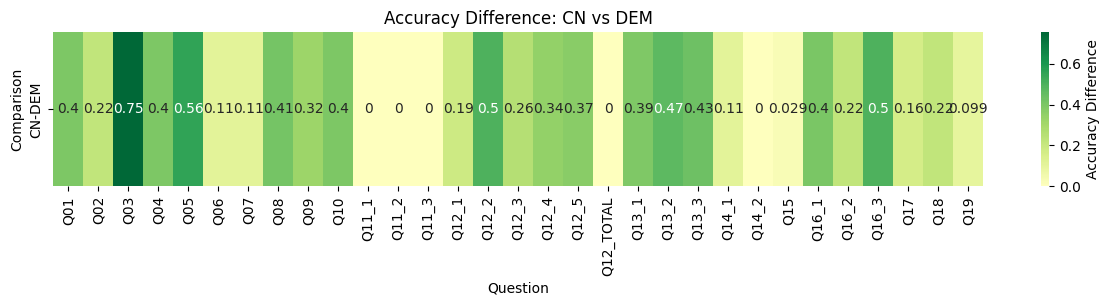

In [15]:
cn_dem_diff = pd.DataFrame({
    'CN-DEM': cn_accuracy - dem_accuracy
}).T

plt.figure(figsize=(15, 2))
sns.heatmap(cn_dem_diff, annot=True, cmap='RdYlGn', center=0, cbar_kws={'label': 'Accuracy Difference'})
plt.title('Accuracy Difference: CN vs DEM')
plt.xlabel('Question')
plt.ylabel('Comparison')
plt.show()

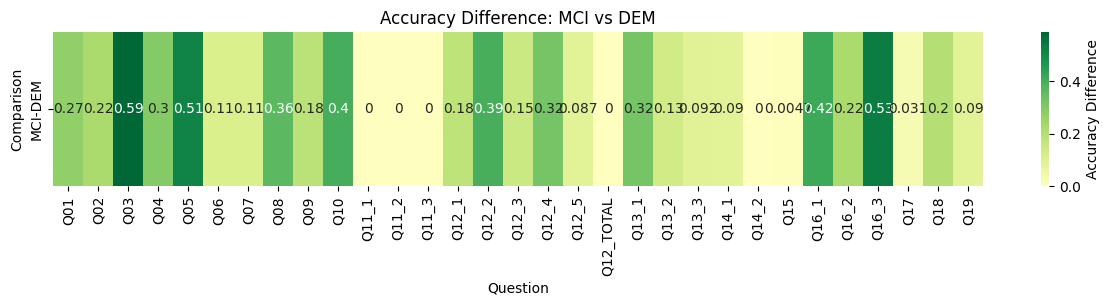

In [16]:
mci_dem_diff = pd.DataFrame({
    'MCI-DEM': mci_accuracy - dem_accuracy
}).T

plt.figure(figsize=(15, 2))
sns.heatmap(mci_dem_diff, annot=True, cmap='RdYlGn', center=0, cbar_kws={'label': 'Accuracy Difference'})
plt.title('Accuracy Difference: MCI vs DEM')
plt.xlabel('Question')
plt.ylabel('Comparison')
plt.show()